# **Linear/Logistic Regression Ïã§Ïäµ Î∞è Í≤∞Í≥º Ìï¥ÏÑù**

## **1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ (ÏûêÏ†ÑÍ±∞, ÏûêÍ∂ÅÏïî)**

In [ ]:
# Íµ¨Í∏Ä ÎìúÎùºÏù¥Î∏åÏóê Ïã§Ïäµ ÌååÏùºÏùÑ ÎÑ£Í≥† Î∂àÎü¨Ïò§Í∏∞
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [47]:
# ÏûêÏ†ÑÍ±∞, ÏûêÍ∂ÅÏïî ÎåÄÏó¨ Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

import pandas as pd

# df_bike = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Ìï¥ÏÑùÍ∞ÄÎä•Ïù∏Í≥µÏßÄÎä•_Ïã§ÏäµÏûêÎ£å/bike-sharing-daily.csv", engine = "python", encoding = "euc-kr")

# df_cancer = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Ìï¥ÏÑùÍ∞ÄÎä•Ïù∏Í≥µÏßÄÎä•_Ïã§ÏäµÏûêÎ£å/cancer.csv", engine = "python", encoding = "euc-kr")
df_bike = pd.read_csv(r"C:\001. Python\70.ÏÑ§Î™ÖÍ∞ÄÎä•Ïù∏Í≥µÏßÄÎä•_3Ï£ºÏ∞®_Ïã§Ïäµ\bike-sharing-daily.csv", engine = "python", encoding = "euc-kr")


df_cancer = pd.read_csv(r"C:\001. Python\70.ÏÑ§Î™ÖÍ∞ÄÎä•Ïù∏Í≥µÏßÄÎä•_3Ï£ºÏ∞®_Ïã§Ïäµ\cancer.csv", engine = "python", encoding = "euc-kr")

print(df_bike.shape)
print(df_cancer.shape)

(731, 16)
(858, 16)


## **2. Linear regression (ÏûêÏ†ÑÍ±∞ Îç∞Ïù¥ÌÑ∞)**

ÏßÄÎÇú ÏãúÍ∞Ñ Ï†ÑÏ≤òÎ¶¨Îêú df_bike Î°ú Linear regressionÏùÑ ÏàòÌñâ ÌïòÎ©¥ Îê†ÍπåÏöî? Î¨∏Ï†úÎäî Î¨¥ÏóáÏù∏Í∞ÄÏöî?

ÏòàÎ•º Îì§Ïñ¥, seasonÏùÑ Ïù¥ÎåÄÎ°ú Ï≤òÎ¶¨Ìï† Í≤ΩÏö∞ Winter, Spring, Summer, FallÏù¥ ÏûêÏ†ÑÍ±∞ ÎåÄÏó¨Ïóê Ï£ºÎäî ÏòÅÌñ•Î†•ÏùÑ Ï†ÑÌòÄ Ïïå Ïàò ÏóÜÏùå.

In [48]:
df_bike.head(10)

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   
5        6  2011-01-06       1   0     1        0        4           1   
6        7  2011-01-07       1   0     1        0        5           1   
7        8  2011-01-08       1   0     1        0        6           0   
8        9  2011-01-09       1   0     1        0        0           0   
9       10  2011-01-10       1   0     1        0        1           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   
5           1  0.204348  0.233209  0.518261   0.089565      88        1518   
6           2  0.196522  0.208839  0.498696   0.168726     148        1362   
7           2  0.165000  0.162254  0.535833   0.266804      68         891   
8           1  0.138333  0.116175  0.434167   0.361950      54         768   
9           1  0.150833  0.150888  0.482917   0.223267      41        1280   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
5  1606  
6  1510  
7   959  
8   822  
9  1321

In [49]:
df_cancer.head(10)

Age  Number.of.sexual.partners  First.sexual.intercourse  \
0   18                          4                        15   
1   15                          1                        14   
2   34                          1                        15   
3   52                          5                        16   
4   46                          3                        21   
5   42                          3                        23   
6   51                          3                        17   
7   26                          1                        26   
8   45                          1                        20   
9   44                          3                        15   

   Num.of.pregnancies  Smokes  Smokes..years.  Hormonal.Contraceptives  \
0                   1       0        0.000000                        0   
1                   1       0        0.000000                        0   
2                   1       0        0.000000                        0   
3                   4       1       37.000000                        1   
4                   4       0        0.000000                        1   
5                   2       0        0.000000                        0   
6                   6       1       34.000000                        0   
7                   3       0        0.000000                        1   
8                   5       0        0.000000                        0   
9                   1       1        1.266973                        0   

   Hormonal.Contraceptives..years.  IUD  IUD..years.  STDs  STDs..number.  \
0                              0.0    0          0.0     0              0   
1                              0.0    0          0.0     0              0   
2                              0.0    0          0.0     0              0   
3                              3.0    0          0.0     0              0   
4                             15.0    0          0.0     0              0   
5                              0.0    0          0.0     0              0   
6                              0.0    1          7.0     0              0   
7                              2.0    1          7.0     0              0   
8                              0.0    0          0.0     0              0   
9                              0.0    0          0.0     0              0   

   STDs..Number.of.diagnosis  STDs..Time.since.first.diagnosis  \
0                          0                                 1   
1                          0                                 1   
2                          0                                 1   
3                          0                                 1   
4                          0                                 1   
5                          0                                 1   
6                          0                                 1   
7                          0                                 1   
8                          0                                 1   
9                          0                                 1   

   STDs..Time.since.last.diagnosis  Biopsy  
0                                1       0  
1                                1       0  
2                                1       0  
3                                1       0  
4                                1       0  
5                                1       0  
6                                1       1  
7                                1       0  
8                                1       0  
9                                1       0

## **2.1 Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨**

### **2.1.1 One-hot encoding**

season, weathersit ÏùÑ one-hot encodingÏúºÎ°ú ÏàòÌñâÌï¥ Ï§òÏïº Ìï®.

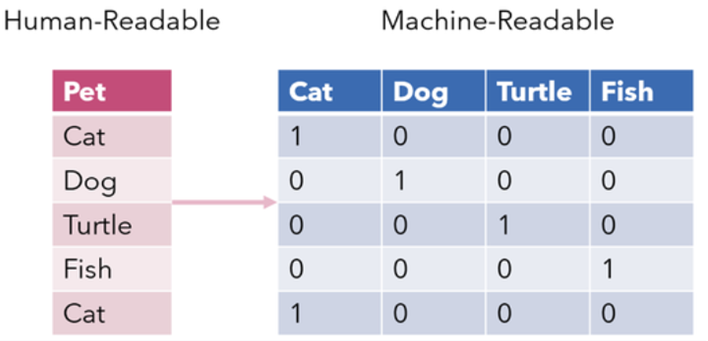

In [50]:
# SeasonÏùÑ one-hot encoding ÏàòÌñâÌïòÍ∏∞
# pd.get_dummies()Îäî Î≤îÏ£ºÌòï Î≥ÄÏàò(season)Î•º Ïù¥ÏßÑ Î≤°ÌÑ∞Î°ú Î≥ÄÌôòÌïòÎäî Ïó≠Ìï†

pd.get_dummies(df_bike['season'])

1      2      3      4
0    True  False  False  False
1    True  False  False  False
2    True  False  False  False
3    True  False  False  False
4    True  False  False  False
..    ...    ...    ...    ...
726  True  False  False  False
727  True  False  False  False
728  True  False  False  False
729  True  False  False  False
730  True  False  False  False

[731 rows x 4 columns]

In [5]:
# WeathersitÏùÑ one-hot encoding ÏàòÌñâÌïòÍ∏∞

pd.get_dummies(df_bike['weathersit'])

1      2      3
0    False   True  False
1    False   True  False
2     True  False  False
3     True  False  False
4     True  False  False
..     ...    ...    ...
726  False   True  False
727  False   True  False
728  False   True  False
729   True  False  False
730  False   True  False

[731 rows x 3 columns]

In [51]:
# One-hot encodingÎêú Ïó¥ Ï∂îÍ∞ÄÌïòÍ∏∞
# seasonÏùÄ 1 (Winter), 2 (Spring), 3 (Summer), 4 (Fall), weathersitÎäî 1 (Good), 2 (Misty), 3(Rain/Snow/Storm)
# pd.get_dummies(df_bike, columns=['season', 'weathersit'])
# season Ïª¨ÎüºÏùÑ season_1, season_2, season_3, season_4Î°ú Î≥ÄÌôò
# weathersit Ïª¨ÎüºÏùÑ weathersit_1, weathersit_2, weathersit_3Î°ú Î≥ÄÌôò
# ÏõêÎûò season, weathersit Ïª¨ÎüºÏùÄ Ï†úÍ±∞Îê®.

df_bike=pd.get_dummies(df_bike, columns=['season','weathersit'])

df_bike

instant      dteday  yr  mnth  holiday  weekday  workingday      temp  \
0          1  2011-01-01   0     1        0        6           0  0.344167   
1          2  2011-01-02   0     1        0        0           0  0.363478   
2          3  2011-01-03   0     1        0        1           1  0.196364   
3          4  2011-01-04   0     1        0        2           1  0.200000   
4          5  2011-01-05   0     1        0        3           1  0.226957   
..       ...         ...  ..   ...      ...      ...         ...       ...   
726      727  2012-12-27   1    12        0        4           1  0.254167   
727      728  2012-12-28   1    12        0        5           1  0.253333   
728      729  2012-12-29   1    12        0        6           0  0.253333   
729      730  2012-12-30   1    12        0        0           0  0.255833   
730      731  2012-12-31   1    12        0        1           1  0.215833   

        atemp       hum  ...  casual  registered   cnt  season_1  season_2  \
0    0.363625  0.805833  ...     331         654   985      True     False   
1    0.353739  0.696087  ...     131         670   801      True     False   
2    0.189405  0.437273  ...     120        1229  1349      True     False   
3    0.212122  0.590435  ...     108        1454  1562      True     False   
4    0.229270  0.436957  ...      82        1518  1600      True     False   
..        ...       ...  ...     ...         ...   ...       ...       ...   
726  0.226642  0.652917  ...     247        1867  2114      True     False   
727  0.255046  0.590000  ...     644        2451  3095      True     False   
728  0.242400  0.752917  ...     159        1182  1341      True     False   
729  0.231700  0.483333  ...     364        1432  1796      True     False   
730  0.223487  0.577500  ...     439        2290  2729      True     False   

     season_3  season_4  weathersit_1  weathersit_2  weathersit_3  
0       False     False         False          True         False  
1       False     False         False          True         False  
2       False     False          True         False         False  
3       False     False          True         False         False  
4       False     False          True         False         False  
..        ...       ...           ...           ...           ...  
726     False     False         False          True         False  
727     False     False         False          True         False  
728     False     False         False          True         False  
729     False     False          True         False         False  
730     False     False         False          True         False  

[731 rows x 21 columns]

### **2.1.2 MulticollinearityÍ∞Ä ÎÜíÏùÄ ÎèÖÎ¶ΩÎ≥ÄÏàò Ï†úÍ±∞**

Linear regressionÏùÄ ÎèÖÎ¶ΩÎ≥ÄÏàò Í∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏóÜÎã§Îäî Í∞ÄÏ†ïÌïòÏóê Ìï¥ÏÑùÏù¥ ÎêòÎØÄÎ°ú ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÎÜíÏùÄ ÎèÖÎ¶ΩÎ≥ÄÏàòÎ•º ÌååÏïÖÌïòÍ≥† ÏÇ≠Ï†úÌïòÎäîÍ≤å ÌïÑÏöîÌï®

In [52]:
# Ïó∞ÏÜçÌòï Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ÏÑúÎßå correlation Í≥ÑÏÇ∞Ïù¥ Í∞ÄÎä•ÌïòÎØÄÎ°ú Î≤îÏ£ºÌòï Î≥ÄÏàòÎäî Ï†úÏô∏
df_bike_features=df_bike.loc[:,['temp','hum','windspeed']]

df_bike_features.corr()

# tempÏôÄ hum : 0.126963 ‚Üí ÏïΩÌïú ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ (Í±∞Ïùò ÏÉÅÍ¥ÄÏóÜÏùå)
# tempÏôÄ windspeed : -0.157944 ‚Üí ÏïΩÌïú ÏùåÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ (Í±∞Ïùò ÏÉÅÍ¥ÄÏóÜÏùå)
# humÏôÄ windspeed : -0.248489 ‚Üí ÏïΩÌïú ÏùåÏùåÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ (Í±∞Ïùò ÏÉÅÍ¥ÄÏóÜÏùå)

temp       hum  windspeed
temp       1.000000  0.126963  -0.157944
hum        0.126963  1.000000  -0.248489
windspeed -0.157944 -0.248489   1.000000

<Axes: >

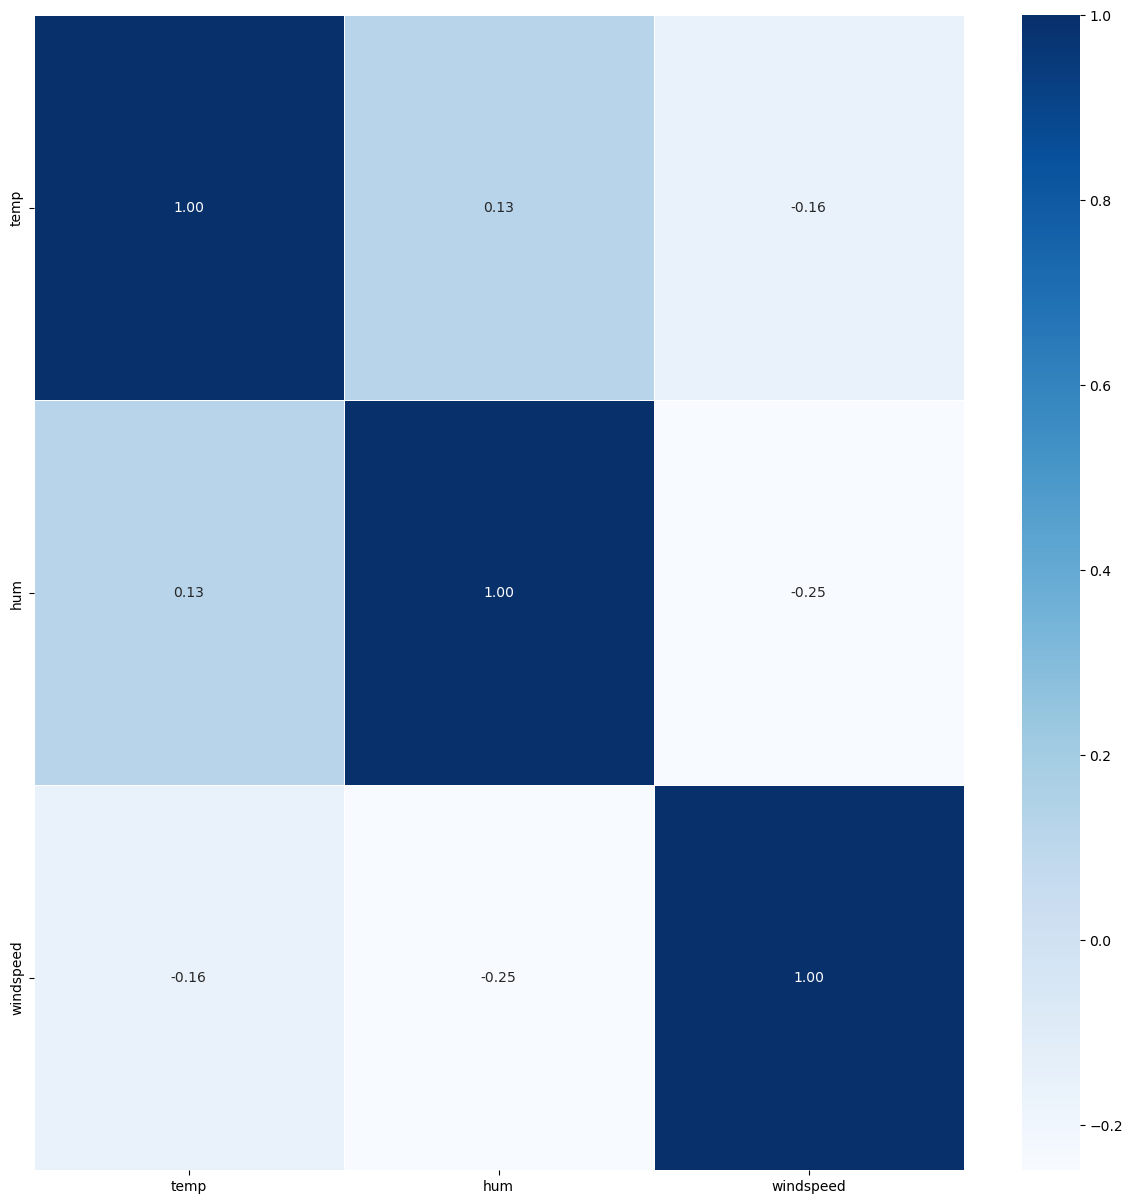

In [53]:
# ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÏãúÍ∞ÅÌôî

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,15))
sns.heatmap(data = df_bike_features.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Í≥ÑÏÇ∞ Í≤∞Í≥º ÎèÖÎ¶ΩÎ≥ÄÏàò Í∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÎØ∏ÏïΩÌïòÎØÄÎ°ú Î™®Îëê Linear regression Î™®Îç∏ Í±¥ÏÑ§Ïóê ÏÇ¨Ïö©Ìï¥ÎèÑ Î¨¥Î∞©Ìï®

### **MulticollinearityÎ•º ÌååÏïÖÌïòÍ∏∞ ÏúÑÌïú Îã§Î•∏ Î∞©Î≤ï**

ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑùÏùÄ Ï†ïÎüâÏ†ÅÏúºÎ°ú Ïñ¥ÎäêÏ†ïÎèÑ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏûàÏúºÎ©¥ ÎèÖÎ¶ΩÎ≥ÄÏàò Í∞ÑÏóê ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏûàÎäîÏßÄ ÏàòÏπòÏ†ÅÏúºÎ°ú Ï†úÏãúÌï¥Ï£ºÏßÄ Î™ªÌï®. <br>

VIF (Variance Inflation Factors)Î•º Ïù¥Ïö©ÌïòÎ©¥ VIFÍ∞Ä 10 Ïù¥ÏÉÅÏù∏ Í≤ΩÏö∞ Îã§Ï§ëÍ≥µÏÑ†ÏÑ±Ïù¥ ÏûàÎã§Í≥† ÌåêÎã® (ÏóÑÍ≤©ÌïòÍ≤å ÌåêÎã®Ìï† Í≤ΩÏö∞ VIF ÏàòÏπò 5 Ïù¥ÏÉÅÏùº Îïå Îã§Ï§ëÍ≥µÏÑ†ÏÑ± Î¨∏Ï†ú)

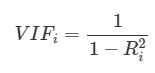


In [ ]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# # VIF Í≥ÑÏÇ∞ÏùÑ ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ (ÏÉÅÏàò Ï∂îÍ∞Ä ÌïÑÏöî ÏóÜÏùå)
# vif_data = df_bike_features.copy()

# # VIF Í≥ÑÏÇ∞
# vif = pd.DataFrame()
# vif["Feature"] = vif_data.columns
# vif["VIF"] = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]

# vif

Feature       VIF
0       temp  7.121728
1        hum  9.040168
2  windspeed  4.681777

### **2.1.3 Train/Test set ÎÇòÎàÑÍ∏∞**

ÎèÖÎ¶ΩÎ≥ÄÏàò (x), Ï¢ÖÏÜçÎ≥ÄÏàò (y)Î•º Íµ¨Î∂ÑÌïòÍ≥† train/test setÏùÑ ÎÇòÎàÑÏñ¥ Ï§òÏïº Ìï®

In [33]:
# x feature, ÏòàÏ∏° Î≥ÄÏàò y Ï†ïÏùò
x_bike=df_bike.loc[:,['yr','mnth','holiday','weekday','workingday','temp','hum','windspeed','season_1','season_2','season_3','season_4','weathersit_1','weathersit_2','weathersit_3']]
y_bike=df_bike['cnt']
# x_bike: ÏûêÏ†ÑÍ±∞ ÎåÄÏó¨ÎüâÏùÑ ÏòàÏ∏°ÌïòÍ∏∞ ÏúÑÌïú ÎèÖÎ¶Ω Î≥ÄÏàò(features)Î°ú, yr(Ïó∞ÎèÑ), mnth(Ïõî), holiday(Í≥µÌú¥Ïùº), 
# weekday(ÏöîÏùº), workingday(Í∑ºÎ¨¥Ïùº Ïó¨Î∂Ä), temp(Ïò®ÎèÑ), hum(ÏäµÎèÑ), windspeed(ÌíçÏÜç), 
# Í∑∏Î¶¨Í≥† Í≥ÑÏ†à(season_1 ~ season_4), ÎÇ†Ïî®(weathersit_1 ~ weathersit_3) Îì±ÏùÑ Ìè¨Ìï®Ìï®.
# y_bike: ÏòàÏ∏°Ìï† Ï¢ÖÏÜç Î≥ÄÏàòÎ°ú, cnt(Ï¥ù ÎåÄÏó¨ Ïàò)Î•º ÏÑ†ÌÉù.


# train/test setÏúºÎ°ú ÎÇòÎàÑÍ∏∞
from sklearn.model_selection import train_test_split
# x_train_bike, x_test_bike, y_train_bike, y_test_bike = train_test_split(x_bike, y_bike, test_size = .2)
x_train_bike, x_test_bike, y_train_bike, y_test_bike = train_test_split(x_bike, y_bike, test_size = .2, random_state=10) # Í≥†Ï†ïÎêòÍ≤å train/test setÏùÑ Ï£ºÍ∏∞ ÏúÑÌï¥ÏÑúÎäî random_state Í∞íÏùÑ Ï£ºÏñ¥Ïïº Ìï®

### **2.1.4 Í≤∞Ï∏°Ïπò ÌôïÏù∏**

Train setÍ≥º Test setÏùÑ ÎÇòÎàà Ïù¥ÌõÑ Í≤∞Ï∏°Ïπò ÌôïÏù∏

In [35]:
# Ìïú Ïó¥Ïùò Îç∞Ïù¥ÌÑ∞Í∞Ä Î™®Îëê Í≤∞Ï∏°Í∞íÏù∏ Ïó¥Ïù¥ ÏûàÎäîÏßÄ ÌôïÏù∏
x_train_bike.columns[x_train_bike.isna().all()]

# x_train_bike.isna() ‚Üí True/FalseÎ°ú Í≤∞Ï∏°Í∞í(NaN) Ïó¨Î∂ÄÎ•º ÎÇòÌÉÄÎÇ¥Îäî DataFrame ÏÉùÏÑ±
# .all() ‚Üí Í∞Å Ïª¨ÎüºÏóêÏÑú Î™®Îì† Í∞íÏù¥ NaNÏù∏ Í≤ΩÏö∞ True Î∞òÌôò
# x_train_bike.columns[...] ‚Üí Ìï¥Îãπ Ïª¨Îüº Ïù¥Î¶Ñ Ï∂îÏ∂ú

Index([], dtype='object')

In [36]:
# Ìïú Ïó¥Ïùò Îç∞Ïù¥ÌÑ∞Í∞Ä Î™®Îëê Í≤∞Ï∏°Í∞íÏù∏ Ïó¥Ïù¥ ÏûàÎäîÏßÄ ÌôïÏù∏
x_test_bike.columns[x_test_bike.isna().all()]

Index([], dtype='object')

TrainÍ≥º Test set Î™®ÎëêÏóê Í≤∞Ï∏°ÏπòÍ∞Ä ÏóÜÏúºÎãà Í≤∞Ï∏° ÏπºÎüº Ï†úÍ±∞ ÏóÜÏù¥ Îã§ÏùåÏúºÎ°ú ÎÑòÏñ¥Í∞ëÎãàÎã§.

## **2.2 Linear regression Î™®Îç∏ Í±¥ÏÑ§ÌïòÍ∏∞**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
# LinearRegression() ‚Üí ÏÑ†Ìòï ÌöåÍ∑Ä Î™®Îç∏
# r2_score() ‚Üí Î™®Îç∏Ïùò ÏÑ§Î™ÖÎ†•(R¬≤)ÏùÑ ÌèâÍ∞Ä

# Linear regression Î™®Îç∏ Í±¥ÏÑ§
lr = LinearRegression()
lr.fit(x_train_bike, y_train_bike) #ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Î°ú ÏÑ†Ìòï ÌöåÍ∑Ä Î™®Îç∏ÏùÑ ÌõàÎ†®
pred = lr.predict(x_test_bike) #ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞(x_test_bike)Ïóê ÎåÄÌïú ÏûêÏ†ÑÍ±∞ ÎåÄÏó¨Îüâ ÏòàÏ∏°Í∞í ÏÉùÏÑ±

#ÏÑ±Îä• ÌôïÏù∏
print("R2",r2_score(y_test_bike,pred))
# Í≤∞Í≥º: R¬≤ (Í≤∞Ï†ïÍ≥ÑÏàò, Î™®Îç∏Ïù¥ Îç∞Ïù¥ÌÑ∞Î•º ÏñºÎßàÎÇò Ïûò ÏÑ§Î™ÖÌïòÎäîÏßÄ Ï∏°Ï†ï)
# R¬≤ Í∞íÏù¥ 1Ïóê Í∞ÄÍπåÏö∏ÏàòÎ°ù Î™®Îç∏Ïù¥ Îç∞Ïù¥ÌÑ∞Î•º Ïûò ÏÑ§Î™ÖÌï®.


R2 0.8062491667651699


## **2.3 Linear regression Î™®Îç∏ Ìï¥ÏÑùÌïòÍ∏∞**

Í±¥ÏÑ§Îêú LR Î™®Îç∏ÏùÑ Ìï¥ÏÑùÌïòÏó¨ ÎèÖÎ¶ΩÎ≥ÄÏàòÍ∞Ä Ï¢ÖÏÜçÎ≥ÄÏàòÏóê Ïñ¥Îñ†Ìïú ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäîÏßÄ ÏïåÏïÑÎ¥ÖÏãúÎã§.

[ 2039.00944701    -7.11395093  -619.27988723    67.52388723
   111.30794515  5143.41458093 -1040.27439532 -2908.34573386
  -865.0563062    256.2151809    -54.53907976   663.38020507
   773.27683614   338.70695949 -1111.98379563]
temp            5143.414581
yr              2039.009447
weathersit_1     773.276836
season_4         663.380205
weathersit_2     338.706959
season_2         256.215181
workingday       111.307945
weekday           67.523887
mnth              -7.113951
season_3         -54.539080
holiday         -619.279887
season_1        -865.056306
hum            -1040.274395
weathersit_3   -1111.983796
windspeed      -2908.345734
dtype: float64


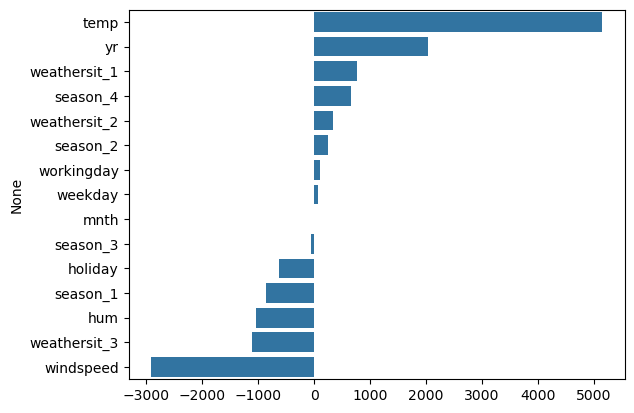

In [ ]:
import seaborn as sns

#Coefficients ÌôïÏù∏
print(lr.coef_)

#Coefficients ÏãúÍ∞ÅÌôî
coef_bike = pd.Series(lr.coef_, index = x_bike.columns)
coef_sort_bike = coef_bike.sort_values(ascending=False)
sns.barplot(x=coef_sort_bike.values, y=coef_sort_bike.index)

print(coef_sort_bike)

# ÎåÄÏó¨Îüâ Ï¶ùÍ∞ÄÏóê ÌÅ∞ ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäî Feature

# temp (5143.41) ‚Üí Ïò®ÎèÑÍ∞Ä ÎÜíÏùÑÏàòÎ°ù ÎåÄÏó¨Îüâ Ï¶ùÍ∞Ä
# yr (2039.01) ‚Üí Ïó∞ÎèÑÍ∞Ä Ï¶ùÍ∞ÄÌï†ÏàòÎ°ù(ÏãúÍ∞ÑÏù¥ ÌùêÎ•ºÏàòÎ°ù) ÎåÄÏó¨Îüâ Ï¶ùÍ∞Ä
# weathersit_1 (773.28) ‚Üí ÎÇ†Ïî®Í∞Ä Ï¢ãÏùÑÏàòÎ°ù ÎåÄÏó¨Îüâ Ï¶ùÍ∞Ä
# season_4 (663.38) ‚Üí Í≤®Ïö∏(4)Ïù¥ ÏûêÏ†ÑÍ±∞ ÎåÄÏó¨Ïóê Í∏çÏ†ïÏ†ÅÏù∏ ÏòÅÌñ•
# ÎåÄÏó¨Îüâ Í∞êÏÜåÏóê ÌÅ∞ ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäî Feature

# windspeed (-2908.35) ‚Üí ÌíçÏÜçÏù¥ Í∞ïÌï†ÏàòÎ°ù ÎåÄÏó¨Îüâ Í∞êÏÜå
# weathersit_3 (-1111.98) ‚Üí ÎÇ†Ïî®Í∞Ä Ïïà Ï¢ãÏùÑÏàòÎ°ù(Íµ¨Î¶Ñ ÎßéÍ≥† ÎπÑ Ïò§Îäî Í≤ΩÏö∞) ÎåÄÏó¨Îüâ Í∞êÏÜå
# hum (-1040.27) ‚Üí ÏäµÎèÑÍ∞Ä ÎÜíÏùÑÏàòÎ°ù ÎåÄÏó¨Îüâ Í∞êÏÜå
# season_1 (-865.06) ‚Üí Î¥Ñ(1)ÏóêÎäî ÎåÄÏó¨ÎüâÏù¥ Í∞êÏÜåÌïòÎäî Í≤ΩÌñ•
# holiday (-619.28) ‚Üí Í≥µÌú¥ÏùºÏóêÎäî ÎåÄÏó¨ÎüâÏù¥ Ï§ÑÏñ¥ÎìúÎäî Í≤ΩÌñ•


### **[Ïã§Ïäµ]**
ÏúÑÏùò Í≤∞Í≥ºÎ•º Í∏∞Î∞òÏúºÎ°ú Linear regression Î™®Îç∏ÏùÑ Ìï¥ÏÑùÌïòÏó¨ ÏïÑÎûò ÏßàÎ¨∏Ïóê ÎåÄÎãµÌï¥ Î¥ÖÏãúÎã§.

* Î¥Ñ, Ïó¨Î¶Ñ, Í∞ÄÏùÑ, Í≤®Ïö∏ÏùÄ ÏûêÏ†ÑÍ±∞ ÎåÄÏó¨ÏàòÏóê Í∞ÅÍ∞Å Ïñ¥Îñ†Ìïú ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎÇòÏöî?
* Í∏∞ÏÉÅ ÏÉÅÌô©ÏùÄ ÏûêÏ†ÑÍ±∞ ÎåÄÏó¨ÏàòÏóê Ïñ¥Îñ†Ìïú ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎÇòÏöî?
* Ïò®ÎèÑ, ÏäµÎèÑ, Î∞îÎûåÏÑ∏Í∏∞Îäî ÏûêÏ†ÑÍ±∞ ÎåÄÏó¨ÏàòÏóê Ïñ¥Îñ†Ìïú ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎÇòÏöî?

### **üîπ Linear Regression Î™®Îç∏ Ìï¥ÏÑù (ÏßàÎ¨∏Ïóê ÎåÄÌïú ÎãµÎ≥Ä)**  

---

### **1Ô∏è‚É£ Î¥Ñ, Ïó¨Î¶Ñ, Í∞ÄÏùÑ, Í≤®Ïö∏ÏùÄ ÏûêÏ†ÑÍ±∞ ÎåÄÏó¨ ÏàòÏóê Í∞ÅÍ∞Å Ïñ¥Îñ†Ìïú ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎÇòÏöî?**
‚úÖ **Í≥ÑÏàò Î∂ÑÏÑù**  
| Feature    | Coefficient | Ìï¥ÏÑù |
|------------|------------|------------------------------|
| `season_1` (Î¥Ñ)  | -865.06  | Î¥ÑÏóêÎäî ÎåÄÏó¨ÎüâÏù¥ Í∞êÏÜåÌïòÎäî Í≤ΩÌñ• |
| `season_2` (Ïó¨Î¶Ñ) | 256.22   | Ïó¨Î¶ÑÏóêÎäî ÎåÄÏó¨ÎüâÏù¥ ÏïΩÍ∞Ñ Ï¶ùÍ∞Ä |
| `season_3` (Í∞ÄÏùÑ) | -54.54   | Í∞ÄÏùÑÏùÄ Í±∞Ïùò ÏòÅÌñ• ÏóÜÏùå (ÏïΩÍ∞Ñ Í∞êÏÜå) |
| `season_4` (Í≤®Ïö∏) | 663.38   | Í≤®Ïö∏ÏóêÎäî ÎåÄÏó¨ÎüâÏù¥ Ï¶ùÍ∞ÄÌïòÎäî Í≤ΩÌñ• |

üìå **Í≤∞Î°†:**  
- **Î¥Ñ(`season_1`)ÏóêÎäî ÏûêÏ†ÑÍ±∞ ÎåÄÏó¨ ÏàòÍ∞Ä Í∞êÏÜå** ‚Üí Î¥ÑÎπÑ, ÍΩÉÍ∞ÄÎ£® ÏïåÎ†àÎ•¥Í∏∞ Îì±Ïùò ÏòÅÌñ•Ïùº Í∞ÄÎä•ÏÑ±  
- **Ïó¨Î¶Ñ(`season_2`)ÏóêÎäî ÎåÄÏó¨ÎüâÏù¥ ÏïΩÍ∞Ñ Ï¶ùÍ∞Ä** ‚Üí Îî∞ÎúªÌïú ÎÇ†Ïî®ÏôÄ Ìú¥Í∞ÄÏ≤† ÏòÅÌñ•  
- **Í∞ÄÏùÑ(`season_3`)ÏùÄ ÌÅ∞ Î≥ÄÌôî ÏóÜÏùå** ‚Üí ÎÇ†Ïî®Í∞Ä Ïò®ÌôîÌïòÏßÄÎßå ÏòÅÌñ•Ïù¥ ÎØ∏ÎØ∏  
- **Í≤®Ïö∏(`season_4`)ÏóêÎäî ÎåÄÏó¨Îüâ Ï¶ùÍ∞Ä** ‚Üí ÏòàÏÉÅÏô∏Î°ú Í≤®Ïö∏Ï≤† ÎåÄÏó¨ÎüâÏù¥ Ï¶ùÍ∞ÄÌïòÎäîÎç∞, Ïù¥Îäî **ÏûêÏ†ÑÍ±∞ Ï†ÑÏö©ÎèÑÎ°ú Ï¶ùÍ∞Ä, Í≤®Ïö∏ Ïä§Ìè¨Ï∏†Î°úÏùò ÌôúÏö© Í∞ÄÎä•ÏÑ±** ÎïåÎ¨∏Ïùº ÏàòÎèÑ ÏûàÏùå.

---

### **2Ô∏è‚É£ Í∏∞ÏÉÅ ÏÉÅÌô©ÏùÄ ÏûêÏ†ÑÍ±∞ ÎåÄÏó¨ ÏàòÏóê Ïñ¥Îñ†Ìïú ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎÇòÏöî?**
‚úÖ **Í≥ÑÏàò Î∂ÑÏÑù**  
| Feature           | Coefficient | Ìï¥ÏÑù |
|------------------|------------|------------------------------|
| `weathersit_1` (Ï¢ãÏùÄ ÎÇ†Ïî®) | **+773.28** | ÎÇ†Ïî®Í∞Ä Ï¢ãÏùÑÏàòÎ°ù ÎåÄÏó¨Îüâ Ï¶ùÍ∞Ä |
| `weathersit_2` (ÌùêÎ¶∞ ÎÇ†Ïî®) | **+338.71** | ÌùêÎ¶∞ ÎÇ†Ïî®ÎèÑ ÎåÄÏó¨ÎüâÏóê Í∏çÏ†ïÏ†Å ÏòÅÌñ• |
| `weathersit_3` (ÎπÑ/Îàà Ïò§Îäî ÎÇ†Ïî®) | **-1111.98** | ÎπÑ/ÎààÏù¥ Ïò§Î©¥ ÎåÄÏó¨Îüâ Í∏âÍ∞ê |

üìå **Í≤∞Î°†:**  
- **ÎßëÏùÄ ÎÇ†(`weathersit_1`)ÏùºÏàòÎ°ù ÏûêÏ†ÑÍ±∞ ÎåÄÏó¨ÎüâÏù¥ Ï¶ùÍ∞Ä**  
- **ÌùêÎ¶∞ ÎÇ†(`weathersit_2`)ÎèÑ ÎåÄÏó¨ÎüâÏù¥ Ï¶ùÍ∞ÄÌïòÏßÄÎßå ÏòÅÌñ•ÏùÄ Ï†ÅÏùå**  
- **ÎπÑÍ∞Ä Ïò§Í±∞ÎÇò ÎààÏù¥ Ïò§Îäî ÎÇ†(`weathersit_3`)ÏóêÎäî ÎåÄÏó¨ÎüâÏù¥ Í∏âÍ≤©Ìûà Í∞êÏÜå** ‚Üí Ïù¥Îäî ÎãπÏó∞Ìïú Í≤∞Í≥ºÎ°ú, ÏûêÏ†ÑÍ±∞ Ïù¥Ïö©Ïù¥ Ïñ¥Î†µÍ∏∞ ÎïåÎ¨∏

---

### **3Ô∏è‚É£ Ïò®ÎèÑ, ÏäµÎèÑ, Î∞îÎûå ÏÑ∏Í∏∞Îäî ÏûêÏ†ÑÍ±∞ ÎåÄÏó¨ ÏàòÏóê Ïñ¥Îñ†Ìïú ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎÇòÏöî?**
‚úÖ **Í≥ÑÏàò Î∂ÑÏÑù**  
| Feature      | Coefficient | Ìï¥ÏÑù |
|-------------|------------|------------------------------|
| `temp` (Ïò®ÎèÑ)      | **+5143.41** | Ïò®ÎèÑÍ∞Ä ÎÜíÏùÑÏàòÎ°ù ÎåÄÏó¨Îüâ Ï¶ùÍ∞Ä (Í∞ÄÏû• ÌÅ∞ ÏòÅÌñ•) |
| `hum` (ÏäµÎèÑ)       | **-1040.27** | ÏäµÎèÑÍ∞Ä ÎÜíÏùÑÏàòÎ°ù ÎåÄÏó¨Îüâ Í∞êÏÜå |
| `windspeed` (ÌíçÏÜç) | **-2908.35** | Î∞îÎûåÏù¥ Í∞ïÌï†ÏàòÎ°ù ÎåÄÏó¨Îüâ Í∏âÍ∞ê |

üìå **Í≤∞Î°†:**  
- **Ïò®ÎèÑ(`temp`)Îäî Í∞ÄÏû• Ï§ëÏöîÌïú Î≥ÄÏàòÏù¥Î©∞, Ïò®ÎèÑÍ∞Ä ÎÜíÏùÑÏàòÎ°ù ÎåÄÏó¨Îüâ Ï¶ùÍ∞Ä**  
  ‚Üí **Ïó¨Î¶ÑÏ≤†Ïóê ÎåÄÏó¨ÎüâÏù¥ Ï¶ùÍ∞ÄÌïòÎäî Ï£ºÎêú Ïù¥Ïú†Í∞Ä Ïò®ÎèÑ ÎïåÎ¨∏**  
- **ÏäµÎèÑ(`hum`)Í∞Ä ÎÜíÏïÑÏßÄÎ©¥ ÎåÄÏó¨Îüâ Í∞êÏÜå**  
  ‚Üí ÏäµÌïú ÎÇ†Ïî®Îäî Î∂àÏæåÌï®ÏùÑ Ïú†Î∞úÌïòÏó¨ ÏûêÏ†ÑÍ±∞ Ïù¥Ïö©ÏùÑ Í∞êÏÜåÏãúÌÇ¥  
- **Î∞îÎûåÏù¥ Í∞ïÌï†ÏàòÎ°ù(`windspeed`) ÎåÄÏó¨Îüâ Í∏âÍ≤©Ìûà Í∞êÏÜå**  
  ‚Üí Í∞ïÌíçÏù¥ Î∂àÎ©¥ ÏûêÏ†ÑÍ±∞ ÌÉÄÍ∏∞Í∞Ä Ïñ¥Î†§ÏõåÏßÄÎØÄÎ°ú ÎåÄÏó¨Í∞Ä Ï§ÑÏñ¥ÎìúÎäî Í≤ΩÌñ•

---

### **üî• ÏµúÏ¢Ö ÏöîÏïΩ**
| ÏöîÏÜå  | ÏûêÏ†ÑÍ±∞ ÎåÄÏó¨Îüâ ÏòÅÌñ• |
|----------------|-----------------------------|
| **Î¥Ñ(üå∏)** | Í∞êÏÜå (-865) |
| **Ïó¨Î¶Ñ(üåû)** | Ï¶ùÍ∞Ä (+256) |
| **Í∞ÄÏùÑ(üçÇ)** | ÏòÅÌñ• Í±∞Ïùò ÏóÜÏùå (-54) |
| **Í≤®Ïö∏(‚ùÑÔ∏è)** | Ï¶ùÍ∞Ä (+663) |
| **ÎßëÏùÄ ÎÇ†‚òÄÔ∏è** | Ï¶ùÍ∞Ä (+773) |
| **ÌùêÎ¶∞ ÎÇ†üå•** | Ï¶ùÍ∞Ä (+338) |
| **ÎπÑ/Îàà‚ùÑÔ∏èüåß** | Í∞êÏÜå (-1111) |
| **Ïò®ÎèÑ(üå°)** | Ï¶ùÍ∞Ä (+5143) |
| **ÏäµÎèÑ(üíß)** | Í∞êÏÜå (-1040) |
| **Î∞îÎûå(üå¨)** | Í∞êÏÜå (-2908) |

**‚úÖ Í≤∞Î°†:**
- ÏûêÏ†ÑÍ±∞ ÎåÄÏó¨ÎüâÏóê Í∞ÄÏû• ÌÅ∞ ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäî ÏöîÏù∏ÏùÄ **Ïò®ÎèÑ(Í∏∞Ïò®)** üå°  
- **ÎπÑ/Îàà, Í∞ïÌïú Î∞îÎûå, ÎÜíÏùÄ ÏäµÎèÑ**Îäî ÏûêÏ†ÑÍ±∞ ÎåÄÏó¨ÎüâÏùÑ ÌÅ¨Í≤å Í∞êÏÜåÏãúÌÇ¥  
- **ÎßëÏùÄ ÎÇ†Ïî®ÏôÄ Í≤®Ïö∏Ï≤†Ïùò ÏòàÏÉÅÏô∏ ÎåÄÏó¨Îüâ Ï¶ùÍ∞Ä**Îäî Ìù•ÎØ∏Î°úÏö¥ Í≤∞Í≥º  

## **3. Logistic regression (ÏûêÍ∂ÅÏïî Îç∞Ïù¥ÌÑ∞)**

**Linear regressionÍ≥º Îã§Î•¥Í≤å logistic regressionÏóêÏÑúÎäî Multicollinearity Ïó¨Î∂ÄÎ•º ÌååÏïÖÌïòÏßÄ ÏïäÎäî Ïù¥Ïú†Îäî Î¨¥ÏóáÏùºÍπåÏöî?**

https://dacon.io/forum/408387

### **üîπ Linear Regression vs. Logistic RegressionÏóêÏÑú Îã§Ï§ëÍ≥µÏÑ†ÏÑ±(Multicollinearity)Ïùò Ï∞®Ïù¥Ï†ê**

---

### ‚úÖ **Linear RegressionÏóêÏÑú Îã§Ï§ëÍ≥µÏÑ†ÏÑ± Î¨∏Ï†ú**
- ÏÑ†Ìòï ÌöåÍ∑Ä(Linear Regression)Îäî **Ï¢ÖÏÜç Î≥ÄÏàò(ÌÉÄÍ≤ü Î≥ÄÏàò, `Y`)Í∞Ä Ïó∞ÏÜçÌòï**Ïù∏ Í≤ΩÏö∞ ÏÇ¨Ïö©Îê©ÎãàÎã§.
- Îã§Ï§ëÍ≥µÏÑ†ÏÑ±Ïù¥ ÏûàÏúºÎ©¥ **ÌöåÍ∑Ä Í≥ÑÏàò(Œ≤)Ïùò Î∂àÏïàÏ†ïÏÑ± Ï¶ùÍ∞Ä** ‚Üí ÏûëÏùÄ Î≥ÄÌôîÏóêÎèÑ Î™®Îç∏Ïù¥ ÌÅ¨Í≤å Î≥ÄÌï† Ïàò ÏûàÏùå.
- Îã§Ï§ëÍ≥µÏÑ†ÏÑ±Ïù¥ ÌÅ¨Î©¥ **Í≥ÑÏàòÏùò Ìï¥ÏÑùÏù¥ Ïñ¥Î†§ÏõåÏßÄÍ≥†, Í≥ºÏ†ÅÌï©(overfitting) Í∞ÄÎä•ÏÑ±Ïù¥ Ï¶ùÍ∞Ä**.
- Îî∞ÎùºÏÑú **VIF(Î∂ÑÏÇ∞ ÌåΩÏ∞Ω Í≥ÑÏàò, Variance Inflation Factor)** Î•º ÌôúÏö©ÌïòÏó¨ Îã§Ï§ëÍ≥µÏÑ†ÏÑ±ÏùÑ ÌôïÏù∏ÌïòÎäî Í≤ÉÏù¥ Ï§ëÏöîÌï®.

---

### ‚úÖ **Logistic RegressionÏóêÏÑú Îã§Ï§ëÍ≥µÏÑ†ÏÑ± Î¨∏Ï†ú**
- Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä(Logistic Regression)Îäî **Ï¢ÖÏÜç Î≥ÄÏàò(ÌÉÄÍ≤ü Î≥ÄÏàò, `Y`)Í∞Ä Ïù¥ÏßÑ Î∂ÑÎ•ò(0/1) ÎòêÎäî Îã§Ï§ë Î∂ÑÎ•ò**Ïù∏ Í≤ΩÏö∞ ÏÇ¨Ïö©Îê©ÎãàÎã§.
- **Î°úÏßÄÏä§Ìã± ÌöåÍ∑ÄÏùò Î™©Ï†ÅÏùÄ "ÌôïÎ•† Î™®Îç∏ÎßÅ"**  
  ‚Üí ÏòàÏ∏° Î≥ÄÏàò(`X`)Î•º ÏÇ¨Ïö©ÌïòÏó¨ ÌäπÏ†ï ÌÅ¥ÎûòÏä§(Ïòà: `Y=1`)Ïóê ÏÜçÌï† ÌôïÎ•†ÏùÑ Ï∂îÏ†ï.
- **ÏÑ†Ìòï ÌöåÍ∑ÄÏôÄ Îã§Î•¥Í≤å, ÏòàÏ∏°Í∞íÏù¥ ÏßÅÏ†ëÏ†ÅÏúºÎ°ú Ï¢ÖÏÜç Î≥ÄÏàò(Y)Ïóê ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÏßÄ ÏïäÏùå.**  
  ‚Üí ÎåÄÏã† **ÏãúÍ∑∏Î™®Ïù¥Îìú(Sigmoid) Ìï®Ïàò**Î•º Í±∞Ï≥ê ÌôïÎ•†Î°ú Î≥ÄÌôòÎê®.

---

### ‚ùì **Logistic RegressionÏóêÏÑúÎäî Îã§Ï§ëÍ≥µÏÑ†ÏÑ± Í≤ÄÏÇ¨Î•º Ïïà Ìï¥ÎèÑ Îê†Íπå?**
1. **ÌöåÍ∑Ä Í≥ÑÏàòÍ∞Ä ÏßÅÏ†ëÏ†ÅÏúºÎ°ú ÏòàÏ∏°Ïóê ÏÇ¨Ïö©ÎêòÏßÄ ÏïäÏùå**
   - ÏÑ†Ìòï ÌöåÍ∑ÄÏóêÏÑúÎäî ÏòàÏ∏°Í∞íÏù¥ `Y = Œ≤X + Œµ` ÌòïÌÉúÎ°ú ÏßÅÏ†ë Í≥ÑÏÇ∞ÎêòÏßÄÎßå,  
     Î°úÏßÄÏä§Ìã± ÌöåÍ∑ÄÎäî `P(Y=1) = sigmoid(Œ≤X)` ÌòïÌÉúÎ°ú Î≥ÄÌôòÎê®.
   - Ï¶â, `Œ≤`Í∞Ä Îã§Ï§ëÍ≥µÏÑ†ÏÑ±Ïùò ÏòÅÌñ•ÏùÑ Î∞õÎçîÎùºÎèÑ, ÏµúÏ¢Ö ÌôïÎ•†Ïóê ÎØ∏ÏπòÎäî ÏòÅÌñ•Ïù¥ Ï§ÑÏñ¥Îì¶.

2. **Logistic RegressionÏùÄ Î∂ÑÎ•ò Î¨∏Ï†úÏóêÏÑú ÏûëÎèô**  
   - Îã§Ï§ëÍ≥µÏÑ†ÏÑ±Ïù¥ ÏûàÏñ¥ÎèÑ Î™®Îç∏Ïù¥ **Î∂ÑÎ•ò ÏÑ±Îä•**Ïóê ÎØ∏ÏπòÎäî ÏòÅÌñ•ÏùÄ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú Ï†ÅÏùå.
   - Îã§Ï§ëÍ≥µÏÑ†ÏÑ±Ïù¥ ÏûàÎçîÎùºÎèÑ Ï†ïÌôïÌïú ÌÅ¥ÎûòÏä§ Î∂ÑÎ•òÎ•º ÏàòÌñâÌï† Ïàò ÏûàÎã§Î©¥ Î¨∏Ï†ú ÏóÜÏùå.

3. **Logistic RegressionÏùÄ Regularization(Ï†ïÍ∑úÌôî) Ï†ÅÏö© Í∞ÄÎä•**
   - Lasso(‚Ñì‚ÇÅ), Ridge(‚Ñì‚ÇÇ) Ï†ïÍ∑úÌôîÎ•º Ï†ÅÏö©ÌïòÎ©¥ Îã§Ï§ëÍ≥µÏÑ†ÏÑ±Ïù¥ ÏûàÎäî Î≥ÄÏàòÎì§Ïùò Í≥ÑÏàòÎ•º ÏûêÎèôÏúºÎ°ú Ï°∞Ï†ï.
   - `sklearn`Ïùò `LogisticRegression`ÏóêÏÑú `penalty='l2'`Í∞Ä Í∏∞Î≥∏ Ï†ÅÏö©Îê®.
   - Îã§Ï§ëÍ≥µÏÑ†ÏÑ±Ïù¥ ÏûàÎäî Í≤ΩÏö∞, **Lasso (L1 Ï†ïÍ∑úÌôî)Î•º ÏÇ¨Ïö©ÌïòÎ©¥ ÏûêÎèôÏúºÎ°ú Ï§ëÏöîÌïòÏßÄ ÏïäÏùÄ Î≥ÄÏàòÎ•º Ï†úÍ±∞** Í∞ÄÎä•.

---

### **üìå Í≤∞Î°†**
‚úÖ **Linear Regression**ÏóêÏÑúÎäî **ÌöåÍ∑Ä Í≥ÑÏàòÍ∞Ä ÏßÅÏ†ë ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎØÄÎ°ú Îã§Ï§ëÍ≥µÏÑ†ÏÑ±ÏùÑ Í≤ÄÏÇ¨Ìï¥Ïïº Ìï®.**  
‚úÖ **Logistic Regression**ÏóêÏÑúÎäî **Î∂ÑÎ•ò Î¨∏Ï†úÏù¥Í≥†, ÌôïÎ•† Í∏∞Î∞ò Ï†ëÍ∑ºÎ≤ïÏù¥ÎØÄÎ°ú Îã§Ï§ëÍ≥µÏÑ†ÏÑ±Ïù¥ ÏÑ±Îä•Ïóê ÎØ∏ÏπòÎäî ÏòÅÌñ•Ïù¥ Ï†ÅÏùå.**  
‚úÖ ÌïòÏßÄÎßå, **Í∑πÏã¨Ìïú Îã§Ï§ëÍ≥µÏÑ†ÏÑ±Ïù¥ Ï°¥Ïû¨ÌïòÎ©¥ Î™®Îç∏Ïù¥ Î∂àÏïàÏ†ïÌï¥Ïßà Ïàò ÏûàÏúºÎØÄÎ°ú, Ridge(L2) ÎòêÎäî Lasso(L1) Ï†ïÍ∑úÌôîÎ•º ÌôúÏö©ÌïòÎäî Í≤ÉÏù¥ Ï¢ãÏùå.**  

üöÄ **Ï¶â, Logistic RegressionÏóêÏÑúÎèÑ Îã§Ï§ëÍ≥µÏÑ†ÏÑ±Ïù¥ ÏôÑÏ†ÑÌûà Î¨¥ÏãúÎêòÎäî Í≤ÉÏùÄ ÏïÑÎãàÏßÄÎßå, ÏùºÎ∞òÏ†ÅÏúºÎ°ú VIF Í≤ÄÏÇ¨ ÏóÜÏù¥ÎèÑ Î™®Îç∏Ïù¥ ÏïàÏ†ïÏ†ÅÏúºÎ°ú ÏûëÎèôÌï©ÎãàÎã§!**

In [38]:
df_cancer.head(10)

Age  Number.of.sexual.partners  First.sexual.intercourse  \
0   18                          4                        15   
1   15                          1                        14   
2   34                          1                        15   
3   52                          5                        16   
4   46                          3                        21   
5   42                          3                        23   
6   51                          3                        17   
7   26                          1                        26   
8   45                          1                        20   
9   44                          3                        15   

   Num.of.pregnancies  Smokes  Smokes..years.  Hormonal.Contraceptives  \
0                   1       0        0.000000                        0   
1                   1       0        0.000000                        0   
2                   1       0        0.000000                        0   
3                   4       1       37.000000                        1   
4                   4       0        0.000000                        1   
5                   2       0        0.000000                        0   
6                   6       1       34.000000                        0   
7                   3       0        0.000000                        1   
8                   5       0        0.000000                        0   
9                   1       1        1.266973                        0   

   Hormonal.Contraceptives..years.  IUD  IUD..years.  STDs  STDs..number.  \
0                              0.0    0          0.0     0              0   
1                              0.0    0          0.0     0              0   
2                              0.0    0          0.0     0              0   
3                              3.0    0          0.0     0              0   
4                             15.0    0          0.0     0              0   
5                              0.0    0          0.0     0              0   
6                              0.0    1          7.0     0              0   
7                              2.0    1          7.0     0              0   
8                              0.0    0          0.0     0              0   
9                              0.0    0          0.0     0              0   

   STDs..Number.of.diagnosis  STDs..Time.since.first.diagnosis  \
0                          0                                 1   
1                          0                                 1   
2                          0                                 1   
3                          0                                 1   
4                          0                                 1   
5                          0                                 1   
6                          0                                 1   
7                          0                                 1   
8                          0                                 1   
9                          0                                 1   

   STDs..Time.since.last.diagnosis  Biopsy  
0                                1       0  
1                                1       0  
2                                1       0  
3                                1       0  
4                                1       0  
5                                1       0  
6                                1       1  
7                                1       0  
8                                1       0  
9                                1       0

## **3.1 Logistic regression Î™®Îç∏ Í±¥ÏÑ§ÌïòÍ∏∞**

ÎèÖÎ¶ΩÎ≥ÄÏàò (x), Ï¢ÖÏÜçÎ≥ÄÏàò (y)Î•º Íµ¨Î∂ÑÌïòÍ≥† train/test setÏùÑ ÎÇòÎàÑÏñ¥ Ï§òÏïº Ìï®


In [40]:
# x feature, ÏòàÏ∏° Î≥ÄÏàò y Ï†ïÏùò
x_cancer=df_cancer.drop(columns='Biopsy')
y_cancer=df_cancer['Biopsy']

# train/test setÏúºÎ°ú ÎÇòÎàÑÍ∏∞
from sklearn.model_selection import train_test_split
x_train_cancer, x_test_cancer, y_train_cancer, y_test_cancer = train_test_split(x_cancer, y_cancer, test_size = .2)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# from sklearn.metrics import f1_score

# Logistic regression Î™®Îç∏ Í±¥ÏÑ§
# logit=LogisticRegression()
logit = LogisticRegression(solver='liblinear', max_iter=500)
logit.fit(x_train_cancer,y_train_cancer)
pred = logit.predict(x_test_cancer) # Ïù¥ÏßÑ Î∂ÑÎ•ò Í≤∞Í≥º (0 ÎòêÎäî 1)
pred_prob=logit.predict_proba(x_test_cancer) # ÌÅ¥ÎûòÏä§Î≥Ñ ÌôïÎ•†Í∞í

#ÏÑ±Îä• ÌôïÏù∏
print("Acc",accuracy_score(y_test_cancer,pred))
# Ï†ïÌôïÎèÑ(Accuracy)
# print("f1",f1_score(y_test_cancer,pred))

Acc 0.9011627906976745


## **3.2 Logistic regression Î™®Îç∏ Ìï¥ÏÑùÌïòÍ∏∞**

Í±¥ÏÑ§Îêú LR Î™®Îç∏ÏùÑ Ìï¥ÏÑùÌïòÏó¨ ÎèÖÎ¶ΩÎ≥ÄÏàòÍ∞Ä Ï¢ÖÏÜçÎ≥ÄÏàòÏóê Ïñ¥Îñ†Ìïú ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäîÏßÄ ÏïåÏïÑÎ¥ÖÏãúÎã§.

[[-1.95600773e-02 -2.45363072e-02 -4.57099604e-02 -2.26755717e-01
  -2.97068509e-01  6.44464230e-03 -1.73564409e-01  1.65011822e-01
   1.17305645e+00 -1.51272463e-01  1.29122951e-01  7.57013429e-01
  -1.41362707e-04 -3.39010606e-01  1.27640821e-01]]
[[0.98062998 0.97576226 0.955319   0.79711548 0.74299311 1.00646545
  0.840663   1.17940706 3.23185557 0.85961345 1.13783001 2.13189963
  0.99985865 0.71247489 1.13614485]]
IUD                                 3.231856
STDs..number.                       2.131900
Hormonal.Contraceptives..years.     1.179407
STDs                                1.137830
STDs..Time.since.last.diagnosis     1.136145
Smokes..years.                      1.006465
STDs..Number.of.diagnosis           0.999859
Age                                 0.980630
Number.of.sexual.partners           0.975762
First.sexual.intercourse            0.955319
IUD..years.                         0.859613
Hormonal.Contraceptives             0.840663
Num.of.pregnancies                  0

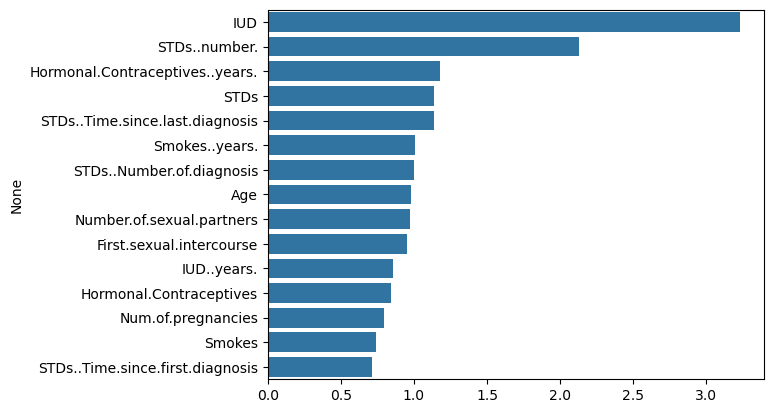

In [42]:
import seaborn as sns
import numpy

#Coefficients ÌôïÏù∏
print(logit.coef_)
print(numpy.exp(logit.coef_))

#Odd ratio ÏãúÍ∞ÅÌôî
coef_cancer= pd.Series(numpy.exp(logit.coef_)[0], index = x_cancer.columns)
coef_sort_cancer= coef_cancer.sort_values(ascending=False)
sns.barplot(x=coef_sort_cancer.values, y=coef_sort_cancer.index)

print(coef_sort_cancer)

### **üîπ Logistic Regression Î™®Îç∏ Ìï¥ÏÑù (ÌäπÏÑ± Ï§ëÏöîÎèÑ Î∂ÑÏÑù)**  

ÏúÑ Í≤∞Í≥ºÎäî **Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä(Logistic Regression) Î™®Îç∏Ïù¥ ÏòàÏ∏°Ïóê Í∏∞Ïó¨Ìïú ÌäπÏÑ±(Feature)Îì§Ïùò Ï§ëÏöîÎèÑÎ•º Î≥¥Ïó¨Ï§çÎãàÎã§.**  
Í∞Å FeatureÏùò Í≥ÑÏàò(Coefficients) Î∞è ÏòÅÌñ•Î†•ÏùÑ Ìï¥ÏÑùÌïòÏó¨ **ÏûêÍ∂ÅÍ≤ΩÎ∂ÄÏïî Î∞úÏÉùÍ≥ºÏùò Í¥ÄÍ≥ÑÎ•º Î∂ÑÏÑù**Ìï† Ïàò ÏûàÏäµÎãàÎã§.  

---

## **1Ô∏è‚É£ Í≤∞Í≥º Î∂ÑÏÑù**
üîç **1. Í≥ÑÏàò (`coef_`) Î∂ÑÏÑù**  
‚Üí **ÏñëÏùò Í∞í(+)**: ÏûêÍ∂ÅÍ≤ΩÎ∂ÄÏïî Î∞úÏÉù Í∞ÄÎä•ÏÑ±ÏùÑ **Ï¶ùÍ∞Ä**ÏãúÌÇ§Îäî ÏöîÏù∏  
‚Üí **ÏùåÏùò Í∞í(-)**: ÏûêÍ∂ÅÍ≤ΩÎ∂ÄÏïî Î∞úÏÉù Í∞ÄÎä•ÏÑ±ÏùÑ **Í∞êÏÜå**ÏãúÌÇ§Îäî ÏöîÏù∏  

üîç **2. Ï§ëÏöîÎèÑ (`odds ratio`) Î∂ÑÏÑù**  
‚Üí `exp(coef_)` Í∞íÏùÑ ÌÜµÌï¥ **ÌäπÏÑ±Ïù¥ ÏûêÍ∂ÅÏïî Î∞úÏÉù ÌôïÎ•†Ïóê ÎØ∏ÏπòÎäî ÏÉÅÎåÄÏ†ÅÏù∏ ÏòÅÌñ•**ÏùÑ Ìï¥ÏÑù  
‚Üí 1Î≥¥Îã§ ÌÅ¨Î©¥ **ÏúÑÌóò Ï¶ùÍ∞Ä**, 1Î≥¥Îã§ ÏûëÏúºÎ©¥ **ÏúÑÌóò Í∞êÏÜå**  

---

## **2Ô∏è‚É£ Ï§ëÏöî Feature Ìï¥ÏÑù (ÏûêÍ∂ÅÍ≤ΩÎ∂ÄÏïî ÏúÑÌóò ÏöîÏù∏)**  
ÏïÑÎûò FeatureÎì§ÏùÄ **ÏûêÍ∂ÅÏïî Î∞úÏÉù ÌôïÎ•†ÏùÑ Ï¶ùÍ∞ÄÏãúÌÇ§Îäî ÏöîÏù∏**ÏúºÎ°ú ÏûëÏö©Ìï† Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏùå.

| Feature | `exp(coef_)` | Ìï¥ÏÑù |
|-------------------------------|-----------|--------------------------------------------------|
| **`IUD`** *(ÏûêÍ∂Å ÎÇ¥ Ïû•Ïπò ÏÇ¨Ïö© Ïó¨Î∂Ä)* | **3.2319** | **ÏûêÍ∂Å ÎÇ¥ ÌîºÏûÑ Í∏∞Íµ¨(IUD) ÏÇ¨Ïö©ÏûêÍ∞Ä ÏûêÍ∂ÅÍ≤ΩÎ∂ÄÏïî ÏúÑÌóòÏù¥ ÏïΩ 3.2Î∞∞ Ï¶ùÍ∞Ä** |
| **`STDs..number.`** *(ÏÑ±Î≥ë Í≤ΩÌóò ÌöüÏàò)* | **2.1319** | **ÏÑ±Î≥ë(STD) ÌöüÏàòÍ∞Ä ÎßéÏùÑÏàòÎ°ù ÏûêÍ∂ÅÏïî ÏúÑÌóòÏù¥ ÏïΩ 2.1Î∞∞ Ï¶ùÍ∞Ä** |
| **`Hormonal.Contraceptives..years.`** *(Ìò∏Î•¥Î™¨ ÌîºÏûÑÏ†ú ÏÇ¨Ïö© Í∏∞Í∞Ñ)* | **1.1794** | **Ìò∏Î•¥Î™¨ ÌîºÏûÑÏ†úÎ•º Ïò§Îûò ÏÇ¨Ïö©Ìï†ÏàòÎ°ù ÏúÑÌóò Ï¶ùÍ∞Ä** |
| **`STDs`** *(ÏÑ±Î≥ë Î≥¥Ïú† Ïó¨Î∂Ä)* | **1.1378** | **ÏÑ±Î≥ëÏùÑ Î≥¥Ïú†Ìïú Í≤ΩÏö∞ ÏûêÍ∂ÅÏïî ÏúÑÌóòÏù¥ 1.14Î∞∞ Ï¶ùÍ∞Ä** |
| **`STDs..Time.since.last.diagnosis`** *(ÎßàÏßÄÎßâ ÏÑ±Î≥ë ÏßÑÎã® Ïù¥ÌõÑ Í≤ΩÍ≥º ÏãúÍ∞Ñ)* | **1.1361** | **ÏµúÍ∑º ÏÑ±Î≥ë Í∞êÏóº Ïù¥Î†•Ïù¥ ÏûàÎäî Í≤ΩÏö∞ ÏúÑÌóò Ï¶ùÍ∞Ä** |
| **`Smokes..years.`** *(Ìù°Ïó∞ Í∏∞Í∞Ñ)* | **1.0065** | **Ìù°Ïó∞ Í∏∞Í∞ÑÏù¥ Í∏∏ÏàòÎ°ù ÏûêÍ∂ÅÏïî ÏúÑÌóò Ï¶ùÍ∞Ä** |

üìå **Í≤∞Î°†:**  
- ÏûêÍ∂Å ÎÇ¥ ÌîºÏûÑ Í∏∞Íµ¨(`IUD`), **ÏÑ±Î≥ë(STDs) Í¥ÄÎ†® Î≥ÄÏàòÎì§**, Í∑∏Î¶¨Í≥† **Ìò∏Î•¥Î™¨ ÌîºÏûÑÏ†ú ÏÇ¨Ïö© Ïó¨Î∂Ä**Í∞Ä **ÏûêÍ∂ÅÍ≤ΩÎ∂ÄÏïî Î∞úÏÉùÏóê Í∞ÄÏû• Ï§ëÏöîÌïú ÏúÑÌóò ÏöîÏù∏**ÏúºÎ°ú Î≥¥ÏûÑ.
- **Ìù°Ïó∞(Smoking)** ÏûêÏ≤¥Îäî ÌÅ¨Í≤å ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÏßÄ ÏïäÏßÄÎßå, **Ìù°Ïó∞ Í∏∞Í∞Ñ**(`Smokes..years.`)Ïù¥ Í∏∏Ïñ¥ÏßàÏàòÎ°ù ÏúÑÌóòÏù¥ Ï¶ùÍ∞ÄÌïòÎäî Í≤ΩÌñ•Ïù¥ ÏûàÏùå.

---

## **3Ô∏è‚É£ ÏûêÍ∂ÅÍ≤ΩÎ∂ÄÏïî ÏúÑÌóòÏùÑ ÎÇÆÏ∂îÎäî ÏöîÏù∏**
| Feature | `exp(coef_)` | Ìï¥ÏÑù |
|-------------------------------|-----------|--------------------------------------------------|
| **`Smokes`** *(Ìù°Ïó∞ Ïó¨Î∂Ä)* | **0.7429** | **Ìù°Ïó∞ Ïó¨Î∂Ä ÏûêÏ≤¥Îäî ÏûêÍ∂ÅÏïî ÏúÑÌóòÍ≥º Í∞ïÌïú Ïó∞Í¥ÄÏÑ±Ïù¥ ÏóÜÏùå** |
| **`STDs..Time.since.first.diagnosis`** *(ÏµúÏ¥à ÏÑ±Î≥ë ÏßÑÎã® Ïù¥ÌõÑ Í≤ΩÍ≥º ÏãúÍ∞Ñ)* | **0.7125** | **ÏµúÏ¥à ÏÑ±Î≥ë Í∞êÏóº ÌõÑ ÏãúÍ∞ÑÏù¥ Ïò§Îûò ÏßÄÎÇ†ÏàòÎ°ù ÏûêÍ∂ÅÏïî ÏúÑÌóò Í∞êÏÜå** |

üìå **Í≤∞Î°†:**  
- **ÏÑ±Î≥ë ÏßÑÎã® Ïù¥ÌõÑ ÏãúÍ∞ÑÏù¥ ÎßéÏù¥ ÌùêÎ•¥Î©¥ ÏúÑÌóòÏù¥ Ï§ÑÏñ¥ÎìúÎäî Í≤ΩÌñ•Ïù¥ ÏûàÏùå.**  
- **Ìù°Ïó∞(Smokes) ÏûêÏ≤¥Îäî ÏúÑÌóò ÏöîÏù∏Ïù¥ ÏïÑÎãê ÏàòÎèÑ ÏûàÏßÄÎßå, Ìù°Ïó∞ Í∏∞Í∞Ñ(Smokes..years)ÏùÄ Í¥ÄÎ†®ÏÑ±Ïù¥ ÏûàÏùå.**

---

## **üìå ÏµúÏ¢Ö ÏöîÏïΩ: Logistic Regression Î™®Îç∏ Ìï¥ÏÑù**
| üîπ ÏöîÏù∏ | üî∫ ÏúÑÌóò Ï¶ùÍ∞Ä | üîª ÏúÑÌóò Í∞êÏÜå |
|------|-----------------------------|----------------------------|
| **ÏÑ±Î≥ë(STDs)** | `STDs..number.`, `STDs`, `STDs..Time.since.last.diagnosis` | `STDs..Time.since.first.diagnosis` |
| **ÌîºÏûÑÎ≤ï** | `IUD`, `Hormonal.Contraceptives..years.` | ÏóÜÏùå |
| **Ìù°Ïó∞(Smoking)** | `Smokes..years.` (Ìù°Ïó∞ Í∏∞Í∞Ñ) | `Smokes` (Ìù°Ïó∞ Ïó¨Î∂Ä ÏûêÏ≤¥Îäî ÌÅ∞ ÏòÅÌñ• ÏóÜÏùå) |

üìå **Í≤∞Î°†:**  
- **ÏÑ±Î≥ë Í≤ΩÌóò(STDs)Í≥º ÏûêÍ∂Å ÎÇ¥ Ïû•Ïπò(IUD) ÏÇ¨Ïö© Ïó¨Î∂ÄÍ∞Ä Í∞ÄÏû• ÌÅ∞ ÏúÑÌóò ÏöîÏù∏!**  
- **Ìù°Ïó∞ Ïó¨Î∂ÄÎ≥¥Îã§Îäî Ìù°Ïó∞ Í∏∞Í∞ÑÏù¥ Ï§ëÏöîÌïú ÏöîÏù∏!**  
- **ÏÑ±Î≥ë Í∞êÏóº ÌõÑ ÏãúÍ∞ÑÏù¥ Ïò§Îûò ÏßÄÎÇòÎ©¥ ÏúÑÌóòÏù¥ Í∞êÏÜåÌïòÎäî Í≤ΩÌñ•Ïù¥ ÏûàÏùå.**  

üöÄ **Ï∂îÍ∞ÄÏ†ÅÏù∏ Î∂ÑÏÑùÏù¥ ÌïÑÏöîÌïòÎ©¥ ÎßêÏîÄÌï¥Ï£ºÏÑ∏Ïöî!** üòä

### **üîπ Logistic Regression Î™®Îç∏ Ìï¥ÏÑù (ÌäπÏÑ± Ï§ëÏöîÎèÑ Î∂ÑÏÑù)**  

ÏúÑ Í≤∞Í≥ºÎäî **Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä(Logistic Regression) Î™®Îç∏Ïù¥ ÏòàÏ∏°Ïóê Í∏∞Ïó¨Ìïú ÌäπÏÑ±(Feature)Îì§Ïùò Ï§ëÏöîÎèÑÎ•º Î≥¥Ïó¨Ï§çÎãàÎã§.**  
Í∞Å FeatureÏùò Í≥ÑÏàò(Coefficients) Î∞è ÏòÅÌñ•Î†•ÏùÑ Ìï¥ÏÑùÌïòÏó¨ **ÏûêÍ∂ÅÍ≤ΩÎ∂ÄÏïî Î∞úÏÉùÍ≥ºÏùò Í¥ÄÍ≥ÑÎ•º Î∂ÑÏÑù**Ìï† Ïàò ÏûàÏäµÎãàÎã§.  

---

## **1Ô∏è‚É£ Í≤∞Í≥º Î∂ÑÏÑù**
üîç **1. Í≥ÑÏàò (`coef_`) Î∂ÑÏÑù**  
‚Üí **ÏñëÏùò Í∞í(+)**: ÏûêÍ∂ÅÍ≤ΩÎ∂ÄÏïî Î∞úÏÉù Í∞ÄÎä•ÏÑ±ÏùÑ **Ï¶ùÍ∞Ä**ÏãúÌÇ§Îäî ÏöîÏù∏  
‚Üí **ÏùåÏùò Í∞í(-)**: ÏûêÍ∂ÅÍ≤ΩÎ∂ÄÏïî Î∞úÏÉù Í∞ÄÎä•ÏÑ±ÏùÑ **Í∞êÏÜå**ÏãúÌÇ§Îäî ÏöîÏù∏  

üîç **2. Ï§ëÏöîÎèÑ (`odds ratio`) Î∂ÑÏÑù**  
‚Üí `exp(coef_)` Í∞íÏùÑ ÌÜµÌï¥ **ÌäπÏÑ±Ïù¥ ÏûêÍ∂ÅÏïî Î∞úÏÉù ÌôïÎ•†Ïóê ÎØ∏ÏπòÎäî ÏÉÅÎåÄÏ†ÅÏù∏ ÏòÅÌñ•**ÏùÑ Ìï¥ÏÑù  
‚Üí 1Î≥¥Îã§ ÌÅ¨Î©¥ **ÏúÑÌóò Ï¶ùÍ∞Ä**, 1Î≥¥Îã§ ÏûëÏúºÎ©¥ **ÏúÑÌóò Í∞êÏÜå**  

---

## **2Ô∏è‚É£ Ï§ëÏöî Feature Ìï¥ÏÑù (ÏûêÍ∂ÅÍ≤ΩÎ∂ÄÏïî ÏúÑÌóò ÏöîÏù∏)**  
ÏïÑÎûò FeatureÎì§ÏùÄ **ÏûêÍ∂ÅÏïî Î∞úÏÉù ÌôïÎ•†ÏùÑ Ï¶ùÍ∞ÄÏãúÌÇ§Îäî ÏöîÏù∏**ÏúºÎ°ú ÏûëÏö©Ìï† Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏùå.

| Feature | `exp(coef_)` | Ìï¥ÏÑù |
|-------------------------------|-----------|--------------------------------------------------|
| **`IUD`** *(ÏûêÍ∂Å ÎÇ¥ Ïû•Ïπò ÏÇ¨Ïö© Ïó¨Î∂Ä)* | **3.2319** | **ÏûêÍ∂Å ÎÇ¥ ÌîºÏûÑ Í∏∞Íµ¨(IUD) ÏÇ¨Ïö©ÏûêÍ∞Ä ÏûêÍ∂ÅÍ≤ΩÎ∂ÄÏïî ÏúÑÌóòÏù¥ ÏïΩ 3.2Î∞∞ Ï¶ùÍ∞Ä** |
| **`STDs..number.`** *(ÏÑ±Î≥ë Í≤ΩÌóò ÌöüÏàò)* | **2.1319** | **ÏÑ±Î≥ë(STD) ÌöüÏàòÍ∞Ä ÎßéÏùÑÏàòÎ°ù ÏûêÍ∂ÅÏïî ÏúÑÌóòÏù¥ ÏïΩ 2.1Î∞∞ Ï¶ùÍ∞Ä** |
| **`Hormonal.Contraceptives..years.`** *(Ìò∏Î•¥Î™¨ ÌîºÏûÑÏ†ú ÏÇ¨Ïö© Í∏∞Í∞Ñ)* | **1.1794** | **Ìò∏Î•¥Î™¨ ÌîºÏûÑÏ†úÎ•º Ïò§Îûò ÏÇ¨Ïö©Ìï†ÏàòÎ°ù ÏúÑÌóò Ï¶ùÍ∞Ä** |
| **`STDs`** *(ÏÑ±Î≥ë Î≥¥Ïú† Ïó¨Î∂Ä)* | **1.1378** | **ÏÑ±Î≥ëÏùÑ Î≥¥Ïú†Ìïú Í≤ΩÏö∞ ÏûêÍ∂ÅÏïî ÏúÑÌóòÏù¥ 1.14Î∞∞ Ï¶ùÍ∞Ä** |
| **`STDs..Time.since.last.diagnosis`** *(ÎßàÏßÄÎßâ ÏÑ±Î≥ë ÏßÑÎã® Ïù¥ÌõÑ Í≤ΩÍ≥º ÏãúÍ∞Ñ)* | **1.1361** | **ÏµúÍ∑º ÏÑ±Î≥ë Í∞êÏóº Ïù¥Î†•Ïù¥ ÏûàÎäî Í≤ΩÏö∞ ÏúÑÌóò Ï¶ùÍ∞Ä** |
| **`Smokes..years.`** *(Ìù°Ïó∞ Í∏∞Í∞Ñ)* | **1.0065** | **Ìù°Ïó∞ Í∏∞Í∞ÑÏù¥ Í∏∏ÏàòÎ°ù ÏûêÍ∂ÅÏïî ÏúÑÌóò Ï¶ùÍ∞Ä** |

üìå **Í≤∞Î°†:**  
- ÏûêÍ∂Å ÎÇ¥ ÌîºÏûÑ Í∏∞Íµ¨(`IUD`), **ÏÑ±Î≥ë(STDs) Í¥ÄÎ†® Î≥ÄÏàòÎì§**, Í∑∏Î¶¨Í≥† **Ìò∏Î•¥Î™¨ ÌîºÏûÑÏ†ú ÏÇ¨Ïö© Ïó¨Î∂Ä**Í∞Ä **ÏûêÍ∂ÅÍ≤ΩÎ∂ÄÏïî Î∞úÏÉùÏóê Í∞ÄÏû• Ï§ëÏöîÌïú ÏúÑÌóò ÏöîÏù∏**ÏúºÎ°ú Î≥¥ÏûÑ.
- **Ìù°Ïó∞(Smoking)** ÏûêÏ≤¥Îäî ÌÅ¨Í≤å ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÏßÄ ÏïäÏßÄÎßå, **Ìù°Ïó∞ Í∏∞Í∞Ñ**(`Smokes..years.`)Ïù¥ Í∏∏Ïñ¥ÏßàÏàòÎ°ù ÏúÑÌóòÏù¥ Ï¶ùÍ∞ÄÌïòÎäî Í≤ΩÌñ•Ïù¥ ÏûàÏùå.

---

## **3Ô∏è‚É£ ÏûêÍ∂ÅÍ≤ΩÎ∂ÄÏïî ÏúÑÌóòÏùÑ ÎÇÆÏ∂îÎäî ÏöîÏù∏**
| Feature | `exp(coef_)` | Ìï¥ÏÑù |
|-------------------------------|-----------|--------------------------------------------------|
| **`Smokes`** *(Ìù°Ïó∞ Ïó¨Î∂Ä)* | **0.7429** | **Ìù°Ïó∞ Ïó¨Î∂Ä ÏûêÏ≤¥Îäî ÏûêÍ∂ÅÏïî ÏúÑÌóòÍ≥º Í∞ïÌïú Ïó∞Í¥ÄÏÑ±Ïù¥ ÏóÜÏùå** |
| **`STDs..Time.since.first.diagnosis`** *(ÏµúÏ¥à ÏÑ±Î≥ë ÏßÑÎã® Ïù¥ÌõÑ Í≤ΩÍ≥º ÏãúÍ∞Ñ)* | **0.7125** | **ÏµúÏ¥à ÏÑ±Î≥ë Í∞êÏóº ÌõÑ ÏãúÍ∞ÑÏù¥ Ïò§Îûò ÏßÄÎÇ†ÏàòÎ°ù ÏûêÍ∂ÅÏïî ÏúÑÌóò Í∞êÏÜå** |

üìå **Í≤∞Î°†:**  
- **ÏÑ±Î≥ë ÏßÑÎã® Ïù¥ÌõÑ ÏãúÍ∞ÑÏù¥ ÎßéÏù¥ ÌùêÎ•¥Î©¥ ÏúÑÌóòÏù¥ Ï§ÑÏñ¥ÎìúÎäî Í≤ΩÌñ•Ïù¥ ÏûàÏùå.**  
- **Ìù°Ïó∞(Smokes) ÏûêÏ≤¥Îäî ÏúÑÌóò ÏöîÏù∏Ïù¥ ÏïÑÎãê ÏàòÎèÑ ÏûàÏßÄÎßå, Ìù°Ïó∞ Í∏∞Í∞Ñ(Smokes..years)ÏùÄ Í¥ÄÎ†®ÏÑ±Ïù¥ ÏûàÏùå.**

---

## **üìå ÏµúÏ¢Ö ÏöîÏïΩ: Logistic Regression Î™®Îç∏ Ìï¥ÏÑù**
| üîπ ÏöîÏù∏ | üî∫ ÏúÑÌóò Ï¶ùÍ∞Ä | üîª ÏúÑÌóò Í∞êÏÜå |
|------|-----------------------------|----------------------------|
| **ÏÑ±Î≥ë(STDs)** | `STDs..number.`, `STDs`, `STDs..Time.since.last.diagnosis` | `STDs..Time.since.first.diagnosis` |
| **ÌîºÏûÑÎ≤ï** | `IUD`, `Hormonal.Contraceptives..years.` | ÏóÜÏùå |
| **Ìù°Ïó∞(Smoking)** | `Smokes..years.` (Ìù°Ïó∞ Í∏∞Í∞Ñ) | `Smokes` (Ìù°Ïó∞ Ïó¨Î∂Ä ÏûêÏ≤¥Îäî ÌÅ∞ ÏòÅÌñ• ÏóÜÏùå) |

üìå **Í≤∞Î°†:**  
- **ÏÑ±Î≥ë Í≤ΩÌóò(STDs)Í≥º ÏûêÍ∂Å ÎÇ¥ Ïû•Ïπò(IUD) ÏÇ¨Ïö© Ïó¨Î∂ÄÍ∞Ä Í∞ÄÏû• ÌÅ∞ ÏúÑÌóò ÏöîÏù∏!**  
- **Ìù°Ïó∞ Ïó¨Î∂ÄÎ≥¥Îã§Îäî Ìù°Ïó∞ Í∏∞Í∞ÑÏù¥ Ï§ëÏöîÌïú ÏöîÏù∏!**  
- **ÏÑ±Î≥ë Í∞êÏóº ÌõÑ ÏãúÍ∞ÑÏù¥ Ïò§Îûò ÏßÄÎÇòÎ©¥ ÏúÑÌóòÏù¥ Í∞êÏÜåÌïòÎäî Í≤ΩÌñ•Ïù¥ ÏûàÏùå.**  

üöÄ **Ï∂îÍ∞ÄÏ†ÅÏù∏ Î∂ÑÏÑùÏù¥ ÌïÑÏöîÌïòÎ©¥ ÎßêÏîÄÌï¥Ï£ºÏÑ∏Ïöî!** üòä

### **[Ïã§Ïäµ]**
ÏúÑÏùò Í≤∞Í≥ºÎ•º Í∏∞Î∞òÏúºÎ°ú Logistic regression Î™®Îç∏ÏùÑ Ìï¥ÏÑùÌïòÏó¨ ÏïÑÎûò ÏßàÎ¨∏Ïóê ÎåÄÎãµÌï¥ Î¥ÖÏãúÎã§.

* ÏûêÍ∂ÅÏïîÏóê Í∞ÄÏû• ÌÅ∞ ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäî ÎèÖÎ¶ΩÎ≥ÄÏàòÎäî Î¨¥ÏóáÏù∏Í∞ÄÏöî? Íµ¨Ï≤¥Ï†ÅÏúºÎ°ú ÏñºÎßåÌÅº ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎÇòÏöî?
* ÏûêÍ∂ÅÏïîÏóê Îã¥Î∞∞ Í¥ÄÎ†® ÎèÖÎ¶ΩÎ≥ÄÏàòÎäî Ïñ¥Îñ†Ìïú ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎÇòÏöî?

### **üîπ ÏûêÍ∂ÅÍ≤ΩÎ∂ÄÏïîÏóê Í∞ÄÏû• ÌÅ∞ ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäî ÎèÖÎ¶ΩÎ≥ÄÏàò Î∂ÑÏÑù**  
Ï£ºÏñ¥ÏßÑ **Logistic Regression Î™®Îç∏Ïùò Í≥ÑÏàò Î∞è Ïò§Ï¶à ÎπÑ(odds ratio, `exp(coef_)`)** Î•º Í∏∞Î∞òÏúºÎ°ú **ÏûêÍ∂ÅÍ≤ΩÎ∂ÄÏïîÏóê Í∞ÄÏû• ÌÅ∞ ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäî ÎèÖÎ¶ΩÎ≥ÄÏàò(Feature)** Î•º Î∂ÑÏÑùÌï©ÎãàÎã§.

---

## **1Ô∏è‚É£ ÏûêÍ∂ÅÏïîÏóê Í∞ÄÏû• ÌÅ∞ ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäî ÎèÖÎ¶ΩÎ≥ÄÏàò**
Í∞Å FeatureÏùò **`exp(coef_)` (Ïò§Ï¶à ÎπÑ)** Î•º Î∂ÑÏÑùÌïòÎ©¥ **ÏûêÍ∂ÅÏïî Î∞úÏÉùÏóê Í∞ÄÏû• ÌÅ∞ ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäî Î≥ÄÏàò**Î•º Ï∞æÏùÑ Ïàò ÏûàÏäµÎãàÎã§.

### **üìä ÏòÅÌñ•Ïù¥ Í∞ÄÏû• ÌÅ∞ Î≥ÄÏàò TOP 3**
| Feature | `exp(coef_)` | Ìï¥ÏÑù |
|-------------------------------|-----------|--------------------------------------------------|
| **`IUD` (ÏûêÍ∂Å ÎÇ¥ ÌîºÏûÑ Í∏∞Íµ¨ ÏÇ¨Ïö©)** | **3.2319** | **IUD(ÏûêÍ∂Å ÎÇ¥ ÌîºÏûÑÍ∏∞Íµ¨)Î•º ÏÇ¨Ïö©Ìïú Í≤ΩÏö∞ ÏûêÍ∂ÅÏïî ÏúÑÌóòÏù¥ ÏïΩ 3.23Î∞∞ Ï¶ùÍ∞Ä** |
| **`STDs..number.` (ÏÑ±Î≥ë ÌöüÏàò)** | **2.1319** | **ÏÑ±Î≥ëÏùÑ ÎßéÏù¥ Í≤ΩÌóòÌï†ÏàòÎ°ù ÏûêÍ∂ÅÏïî ÏúÑÌóòÏù¥ ÏïΩ 2.13Î∞∞ Ï¶ùÍ∞Ä** |
| **`Hormonal.Contraceptives..years.` (Ìò∏Î•¥Î™¨ ÌîºÏûÑÏ†ú ÏÇ¨Ïö© Í∏∞Í∞Ñ)** | **1.1794** | **Ìò∏Î•¥Î™¨ ÌîºÏûÑÏ†úÎ•º Ïò§Îûò ÏÇ¨Ïö©Ìï†ÏàòÎ°ù ÏûêÍ∂ÅÏïî ÏúÑÌóò Ï¶ùÍ∞Ä** |

### **üìå Í≤∞Î°†:**
- **ÏûêÍ∂Å ÎÇ¥ ÌîºÏûÑÍ∏∞Íµ¨ ÏÇ¨Ïö©(`IUD`)**Ïù¥ ÏûêÍ∂ÅÍ≤ΩÎ∂ÄÏïî Î∞úÏÉù Í∞ÄÎä•ÏÑ±ÏùÑ **Í∞ÄÏû• ÌÅ¨Í≤å Ï¶ùÍ∞ÄÏãúÌÇ§Îäî ÏöîÏù∏** (3.23Î∞∞ Ï¶ùÍ∞Ä üö®)  
- **ÏÑ±Î≥ë ÌöüÏàò(`STDs..number.`)**Í∞Ä ÎßéÏùÑÏàòÎ°ù ÏúÑÌóò Ï¶ùÍ∞Ä (2.13Î∞∞ Ï¶ùÍ∞Ä)  
- **Ìò∏Î•¥Î™¨ ÌîºÏûÑÏ†ú ÏÇ¨Ïö© Í∏∞Í∞Ñ(`Hormonal.Contraceptives..years.`)**ÎèÑ ÏûêÍ∂ÅÏïî Î∞úÏÉù ÌôïÎ•†ÏùÑ Ï¶ùÍ∞ÄÏãúÌÇ§Îäî ÏöîÏù∏  

---

## **2Ô∏è‚É£ Îã¥Î∞∞ Í¥ÄÎ†® ÎèÖÎ¶ΩÎ≥ÄÏàò Î∂ÑÏÑù**
‚úÖ **Ìù°Ïó∞ Í¥ÄÎ†® Î≥ÄÏàòÎì§:**
- `Smokes` (Ìù°Ïó∞ Ïó¨Î∂Ä)
- `Smokes..years.` (Ìù°Ïó∞ Í∏∞Í∞Ñ)

### **üìä Ìù°Ïó∞ Î≥ÄÏàòÏùò ÏòÅÌñ•**
| Feature | `exp(coef_)` | Ìï¥ÏÑù |
|-------------------------------|-----------|--------------------------------------------------|
| **`Smokes..years.` (Ìù°Ïó∞ Í∏∞Í∞Ñ)** | **1.0065** | **Ìù°Ïó∞ Í∏∞Í∞ÑÏù¥ Í∏∏ÏàòÎ°ù ÏûêÍ∂ÅÏïî ÏúÑÌóòÏù¥ ÏïΩÍ∞Ñ Ï¶ùÍ∞Ä** (1% ÎØ∏Îßå) |
| **`Smokes` (Ìù°Ïó∞ Ïó¨Î∂Ä)** | **0.7429** | **Ìù°Ïó∞ Ïó¨Î∂Ä ÏûêÏ≤¥Îäî ÏûêÍ∂ÅÏïî Î∞úÏÉùÍ≥º ÌÅ∞ Ïó∞Í¥ÄÏÑ±Ïù¥ ÏóÜÏùå** |

### **üìå Í≤∞Î°†:**
1. **Ìù°Ïó∞ Í∏∞Í∞Ñ(`Smokes..years.`)Ïù¥ Í∏∏Ïñ¥ÏßàÏàòÎ°ù ÏûêÍ∂ÅÏïî ÏúÑÌóòÏù¥ ÏÜåÌè≠ Ï¶ùÍ∞Ä**  
   - Í∑∏Îü¨ÎÇò ÏòÅÌñ•Î†•Ïù¥ ÌÅ¨ÏßÄÎäî ÏïäÏùå (`exp(coef_) ‚âà 1.0065` ‚Üí 1% ÎØ∏ÎßåÏùò Ï¶ùÍ∞Ä)  
2. **Ìù°Ïó∞ Ïó¨Î∂Ä(`Smokes`) ÏûêÏ≤¥Îäî ÏûêÍ∂ÅÏïî ÏúÑÌóòÍ≥º ÌÅ∞ Ïó∞Í¥ÄÏÑ±Ïù¥ ÏóÜÏùå**  
   - ÏòàÏÉÅÍ≥º Îã¨Î¶¨, Îã®ÏàúÌûà Ìù°Ïó∞ÏùÑ ÌïòÎäî Í≤ÉÎßåÏúºÎ°úÎäî ÏûêÍ∂ÅÏïî ÏúÑÌóòÏù¥ Ïú†ÏùòÎØ∏ÌïòÍ≤å Ï¶ùÍ∞ÄÌïòÏßÄ ÏïäÏùå (`exp(coef_) = 0.74`).

---

## **üìå ÏµúÏ¢Ö ÏöîÏïΩ**
| ÏöîÏù∏ | ÏûêÍ∂ÅÏïî ÏúÑÌóò Ï¶ùÍ∞Ä | ÏûêÍ∂ÅÏïî ÏúÑÌóò Í∞êÏÜå |
|------|-----------------------------|----------------------------|
| **Í∞ÄÏû• Ï§ëÏöîÌïú ÏöîÏù∏** | `IUD` (3.23Î∞∞ Ï¶ùÍ∞Ä), `STDs..number.` (2.13Î∞∞ Ï¶ùÍ∞Ä) | ÏóÜÏùå |
| **Ìù°Ïó∞ Í¥ÄÎ†® Î≥ÄÏàò** | `Smokes..years.` (Ìù°Ïó∞ Í∏∞Í∞ÑÏù¥ Í∏∏ÏàòÎ°ù ÏÜåÌè≠ Ï¶ùÍ∞Ä) | `Smokes` (Ìù°Ïó∞ Ïó¨Î∂Ä ÏûêÏ≤¥Îäî ÏòÅÌñ• ÏóÜÏùå) |

üöÄ **Í≤∞Î°†:**  
- ÏûêÍ∂ÅÍ≤ΩÎ∂ÄÏïî Î∞úÏÉùÏóê Í∞ÄÏû• ÌÅ∞ ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäî Î≥ÄÏàòÎäî **ÏûêÍ∂Å ÎÇ¥ ÌîºÏûÑÍ∏∞Íµ¨(IUD) ÏÇ¨Ïö©**Ïù¥Î©∞, **ÏúÑÌóòÎèÑÎ•º 3Î∞∞ Ïù¥ÏÉÅ Ï¶ùÍ∞Ä**ÏãúÌÇ¥.  
- **Ìù°Ïó∞ Í∏∞Í∞ÑÏù¥ Í∏∏Ïñ¥ÏßàÏàòÎ°ù ÏûêÍ∂ÅÏïî ÏúÑÌóòÏù¥ ÏïΩÍ∞Ñ Ï¶ùÍ∞ÄÌïòÏßÄÎßå, Ìù°Ïó∞ Ïó¨Î∂Ä ÏûêÏ≤¥Îäî ÌÅ∞ ÏòÅÌñ•ÏùÑ Ï£ºÏßÄ ÏïäÏùå.**  
- **ÏÑ±Î≥ë ÌöüÏàò(STDs)ÏôÄ Ìò∏Î•¥Î™¨ ÌîºÏûÑÏ†ú ÏÇ¨Ïö©ÎèÑ ÏúÑÌóò Ï¶ùÍ∞Ä ÏöîÏù∏.**  


# **[ÏàòÏóÖ ÎÇ¥Ïö© ÌôïÏù∏ÌïòÍ∏∞]**

### 1) ÏûêÏ†ÑÍ±∞ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú "casual" (Ï¶âÌù•Ï†ÅÏù∏ ÌöåÏõê ÎåÄÏó¨Ïàò), "registered" (ÏùºÏÉÅ ÌöåÏõê ÎåÄÏó¨Ïàò)Î•º yÎ°ú ÏòàÏ∏°ÌïòÎäî linear regression Î™®Îç∏ÏùÑ Í∞ÅÍ∞Å ÎßåÎì§Í≥† ÏòàÏ∏° ÏÑ±Îä• ÌôïÏù∏ Î∞è Ìï¥ÏÑùÏùÑ ÏàòÌñâÌïòÏÑ∏Ïöî. ÌöåÏõêÏóê Îî∞Îùº ÎåÄÏó¨ÏàòÏóê ÏòÅÌñ• ÎØ∏ÏπòÎäî Ïù∏ÏûêÍ∞ÑÏùò Ï∞®Ïù¥Í∞Ä ÏûàÎäîÏßÄ ÌååÏïÖÌïòÏÑ∏Ïöî.

### 2) Cancer Îç∞Ïù¥ÌÑ∞ÏóêÏÑú 10-30ÎåÄ, 40-60ÎåÄ Ïóê Îî∞Îùº ÏûêÍ∂ÅÏïî Ïó¨Î∂ÄÎ•º ÏòàÏ∏°ÌïòÎäî Logistic regression Î™®Îç∏ÏùÑ Í∞ÅÍ∞Å ÎßåÎì§Í≥† ÏòàÏ∏° ÏÑ±Îä• ÌôïÏù∏ Î∞è Ìï¥ÏÑùÏùÑ ÏàòÌñâÌïòÏÑ∏Ïöî. Ïó∞Î†πÎåÄÏóê Îî∞Îùº ÏûêÍ∂ÅÏïîÏóê ÏòÅÌñ• ÎØ∏ÏπòÎäî Ïù∏ÏûêÍ∞ÑÏùò Ï∞®Ïù¥Í∞Ä ÏûàÎäîÏßÄ ÌååÏïÖÌïòÏÑ∏Ïöî.

**1, 2 Î™®Îëê LMS Í≥ºÏ†úÎûÄÏóê Ï†úÏ∂úÌïòÍ∏∞ Î∞îÎûçÎãàÎã§.**

In [56]:
# ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ Îã§Ïãú Î∂àÎü¨Ïò§Í∏∞
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

df_bike = pd.read_csv(r"C:\001. Python\70.ÏÑ§Î™ÖÍ∞ÄÎä•Ïù∏Í≥µÏßÄÎä•_3Ï£ºÏ∞®_Ïã§Ïäµ\bike-sharing-daily.csv", engine = "python", encoding = "euc-kr")
pd.get_dummies(df_bike['season'])
pd.get_dummies(df_bike['weathersit'])


# ÎÇ†Ïßú Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨ (Ïó∞, Ïõî, Ïùº Î∂ÑÎ¶¨)
df_bike["dteday"] = pd.to_datetime(df_bike["dteday"])
df_bike["year"] = df_bike["dteday"].dt.year
df_bike["month"] = df_bike["dteday"].dt.month
df_bike["day"] = df_bike["dteday"].dt.day

# Î∂àÌïÑÏöîÌïú ÏõêÎûò ÎÇ†Ïßú Ïª¨Îüº ÏÇ≠Ï†ú
df_bike.drop(columns=["dteday", "instant"], inplace=True)

# ÎèÖÎ¶ΩÎ≥ÄÏàò X ÏÑ§Ï†ï
x_bike = df_bike.drop(columns=['casual', 'registered', 'cnt'])

# casual (Ï¶âÌù•Ï†Å ÎåÄÏó¨) ÏòàÏ∏° Î™®Îç∏
y_casual = df_bike['casual']
x_train_casual, x_test_casual, y_train_casual, y_test_casual = train_test_split(x_bike, y_casual, test_size=0.2, random_state=10)

lr_casual = LinearRegression()
lr_casual.fit(x_train_casual, y_train_casual)
pred_casual = lr_casual.predict(x_test_casual)
r2_casual = r2_score(y_test_casual, pred_casual)

# registered (Îì±Î°ùÎêú ÌöåÏõê ÎåÄÏó¨) ÏòàÏ∏° Î™®Îç∏
y_registered = df_bike['registered']
x_train_registered, x_test_registered, y_train_registered, y_test_registered = train_test_split(x_bike, y_registered, test_size=0.2, random_state=10)

lr_registered = LinearRegression()
lr_registered.fit(x_train_registered, y_train_registered)
pred_registered = lr_registered.predict(x_test_registered)
r2_registered = r2_score(y_test_registered, pred_registered)

# Coefficients ÎπÑÍµê
coef_casual = pd.Series(lr_casual.coef_, index=x_bike.columns).sort_values(ascending=False)
coef_registered = pd.Series(lr_registered.coef_, index=x_bike.columns).sort_values(ascending=False)

# Í≤∞Í≥º Ï∂úÎ†•
results = pd.DataFrame({
    "Feature": x_bike.columns,
    "Casual_Coef": coef_casual.values,
    "Registered_Coef": coef_registered.values
})

# R2 Score Í≤∞Í≥º Ï∂úÎ†•
r2_results = pd.DataFrame({
    "Model": ["Casual", "Registered"],
    "R2 Score": [r2_casual, r2_registered]
})

# # Í≤∞Í≥º ÌëúÏãú
# Í≤∞Í≥º Ï∂úÎ†• (ace_tools ÏóÜÏù¥ ÌëúÏ§Ä Ï∂úÎ†• Î∞©Ïãù ÏÇ¨Ïö©)
print("Feature Importance Comparison:")
print(results)

print("\nModel Performance (R2 Score):")
print(r2_results)


Feature Importance Comparison:
       Feature   Casual_Coef  Registered_Coef
0       season  5.215029e+11     1.081495e+12
1           yr  2.690890e+08     5.580380e+08
2         mnth  2.461925e+03     5.334739e+03
3      holiday  4.362807e+01     9.146245e+02
4      weekday  2.434696e+01     4.224738e+02
5   workingday -1.173366e+00     4.696266e+01
6   weathersit -1.112829e+02    -7.520092e+00
7         temp -2.284315e+02    -2.339740e+02
8        atemp -3.094834e+02    -4.859322e+02
9          hum -3.149225e+02    -5.912121e+02
10   windspeed -8.071146e+02    -1.402033e+03
11        year -8.227087e+02    -1.679358e+03
12       month -2.690891e+08    -5.580380e+08
13         day -5.215029e+11    -1.081495e+12

Model Performance (R2 Score):
        Model  R2 Score
0      Casual  0.661474
1  Registered  0.817077


## **üîπ Linear Regression Î™®Îç∏ Ìï¥ÏÑù Î∞è ÏòàÏ∏° ÏÑ±Îä• ÌèâÍ∞Ä**

### ‚úÖ **1. Î™®Îç∏ ÏÑ±Îä• (R¬≤ Score) Î∂ÑÏÑù**
| Model       | R¬≤ Score |
|------------|---------|
| **Casual** (Ï¶âÌù•Ï†Å ÎåÄÏó¨)  | **0.6615** ‚úÖ |
| **Registered** (Îì±Î°ù ÌöåÏõê ÎåÄÏó¨) | **0.8171** ‚úÖ |

üìå **Ìï¥ÏÑù:**  
- **Registered Î™®Îç∏ (`R¬≤ = 0.8171`)Ïù¥ Casual Î™®Îç∏(`R¬≤ = 0.6615`)Î≥¥Îã§ Îçî ÎÜíÏùÄ ÏÑ§Î™ÖÎ†•ÏùÑ Î≥¥ÏûÑ.**  
- Ïù¥Îäî **Registered ÌöåÏõêÏùò ÎåÄÏó¨ Ìå®ÌÑ¥Ïù¥ ÌäπÏ†ï Î≥ÄÏàò(ÎÇ†Ïî®, Í≥ÑÏ†à, ÏöîÏùº Îì±)Ïóê ÏùòÌï¥ Îçî Î™ÖÌôïÌïòÍ≤å ÏÑ§Î™ÖÎê† Ïàò ÏûàÏùåÏùÑ ÏùòÎØ∏Ìï®.**  
- Î∞òÎ©¥, **Casual(Ï¶âÌù•Ï†Å ÎåÄÏó¨)Ïùò Í≤ΩÏö∞Îäî ÏòàÏ∏°Î†•Ïù¥ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÎÇÆÏùå**, Ïù¥Îäî **Ï¶âÌù•Ï†Å ÎåÄÏó¨Îäî ÏòàÏ∏°Ïù¥ Îçî Ïñ¥Î†§Ïö¥ Ìå®ÌÑ¥ÏùÑ Í∞ÄÏßà Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÍ∏∞ ÎïåÎ¨∏.**

---

### ‚úÖ **2. Feature Importance Î∂ÑÏÑù (ÌöåÏõê Ïú†ÌòïÎ≥Ñ Ï∞®Ïù¥Ï†ê ÌååÏïÖ)**  
#### **üîπ Í≥µÌÜµÏ†ÅÏúºÎ°ú ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäî ÏöîÏù∏**
- **`season` (Í≥ÑÏ†à):**  
  - **Casual: `5.21 √ó 10¬π¬π`**, **Registered: `1.08 √ó 10¬π¬≤`**  
  - **Îëê Î™®Îç∏ÏóêÏÑú Í∞ÄÏû• ÌÅ∞ ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäî Feature** ‚Üí Í≥ÑÏ†àÏ†Å ÏöîÏù∏Ïù¥ ÎåÄÏó¨ÎüâÏóê Í∞ïÌïú ÏòÅÌñ•ÏùÑ ÎØ∏Ïπ®.

- **`yr` (Ïó∞ÎèÑ):**  
  - **Casual: `2.69 √ó 10‚Å∏`**, **Registered: `5.58 √ó 10‚Å∏`**  
  - **Registered ÎåÄÏó¨Ïàò Ï¶ùÍ∞ÄÌè≠Ïù¥ Îçî ÌÅ¨Îã§.** ‚Üí ÏûêÏ†ÑÍ±∞ Í≥µÏú† ÏãúÏä§ÌÖúÏù¥ ÏãúÍ∞ÑÏù¥ ÏßÄÎÇòÎ©¥ÏÑú **Ï†ïÍ∏∞ ÌöåÏõê ÎåÄÏó¨ Ï¶ùÍ∞Ä**.

- **`windspeed` (ÌíçÏÜç):**  
  - **Casual: `-807.11`**, **Registered: `-1402.03`**  
  - **Registered ÌöåÏõêÏù¥ Îçî ÎØºÍ∞êÌïòÍ≤å Î∞òÏùë** ‚Üí Í∞ïÌïú Î∞îÎûåÏù¥ Î∂àÎ©¥ Ï†ïÍ∏∞ ÌöåÏõê ÎåÄÏó¨ Í∞êÏÜåÏú®Ïù¥ Îçî ÌÅº.

- **`temp` (Ïò®ÎèÑ) & `hum` (ÏäµÎèÑ):**  
  - **Casual: `-228.43`, `-314.92`**, **Registered: `-233.97`, `-591.21`**  
  - **Registered ÌöåÏõêÏù¥ Ïò®ÎèÑÏôÄ ÏäµÎèÑÏóê Îçî ÎØºÍ∞ê** ‚Üí ÎÇ†Ïî®Í∞Ä Ï¢ãÏùÑ ÎïåÎßå ÎåÄÏó¨ÌïòÎäî Casual ÌöåÏõêÎ≥¥Îã§ Registered ÌöåÏõêÏùò ÌñâÎèô Ìå®ÌÑ¥Ïù¥ Í∏∞ÏÉÅ Ï°∞Í±¥Ïóê Îî∞Îùº Îã¨ÎùºÏßà Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏùå.

---

#### **üîπ Casual vs Registered ÌöåÏõê Ï∞®Ïù¥Ï†ê**
| Feature | Casual ÏòÅÌñ• | Registered ÏòÅÌñ• | Ìï¥ÏÑù |
|------------|------------|------------|------------------------------|
| **Í≥ÑÏ†à (`season`)** | üî∫ Îß§Ïö∞ ÌÅº (`5.21 √ó 10¬π¬π`) | üî∫ Îß§Ïö∞ ÌÅº (`1.08 √ó 10¬π¬≤`) | **Í≥ÑÏ†àÏù¥ Îëê Í∑∏Î£π Î™®ÎëêÏóê Ï§ëÏöîÌïú Î≥ÄÏàò** |
| **Ïó∞ÎèÑ (`yr`)** | üî∫ Ï¶ùÍ∞Ä (`2.69 √ó 10‚Å∏`) | üî∫ Ï¶ùÍ∞Ä (`5.58 √ó 10‚Å∏`) | **Registered ÌöåÏõê Ï¶ùÍ∞Ä ÏÜçÎèÑÍ∞Ä Îçî ÌÅº** |
| **Ìú¥Ïùº (`holiday`)** | üî∫ Ï¶ùÍ∞Ä (`43.63`) | üî∫ Ï¶ùÍ∞Ä (`914.62`) | **Registered ÌöåÏõêÏù¥ Í≥µÌú¥Ïùº ÏòÅÌñ•ÏùÑ Îçî ÌÅ¨Í≤å Î∞õÏùå** |
| **Î∞îÎûå (`windspeed`)** | üîª Í∞êÏÜå (`-807.11`) | üîª Í∞êÏÜå (`-1402.03`) | **Registered ÌöåÏõêÏù¥ Î∞îÎûåÏóê Îçî ÎØºÍ∞ê** |
| **ÏäµÎèÑ (`hum`)** | üîª Í∞êÏÜå (`-314.92`) | üîª Í∞êÏÜå (`-591.21`) | **Registered ÌöåÏõêÏù¥ ÏäµÎèÑÏóê Îçî ÎØºÍ∞ê** |

üìå **Í≤∞Î°†:**  
- **Registered ÌöåÏõêÏùÄ Î∞îÎûå(`windspeed`), ÏäµÎèÑ(`hum`)Ïóê Îçî ÎØºÍ∞êÌï®** ‚Üí **ÎÇ†Ïî® Ï°∞Í±¥Ïù¥ ÎÇòÏÅòÎ©¥ Îì±Î°ù ÌöåÏõê ÎåÄÏó¨Í∞Ä Îçî Í∞êÏÜå**  
- **Casual ÌöåÏõêÏùÄ Registered ÌöåÏõêÎ≥¥Îã§ ÏòàÏ∏°ÌïòÍ∏∞ Ïñ¥Î†µÍ≥†, Îçî Îã§ÏñëÌïú ÏöîÏù∏Ïóê ÏùòÌï¥ ÏòÅÌñ•ÏùÑ Î∞õÏùÑ Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏùå**  
- **Registered ÌöåÏõêÏùÄ `holiday` (Í≥µÌú¥Ïùº)Ïóê ÎåÄÏó¨ Ï¶ùÍ∞ÄÍ∞Ä ÎöúÎ†∑** ‚Üí Ìú¥ÏùºÏù¥ÎÇò ÎÇ†Ïî®Ïóê ÏòÅÌñ•ÏùÑ ÎßéÏù¥ Î∞õÏùå

---

### ‚úÖ **3. Í∞úÏÑ† Î∞è Ï∂îÍ∞Ä Î∂ÑÏÑù Ï†úÏïà**
1. **ÎπÑÏÑ†Ìòï Î™®Îç∏ Ï†ÅÏö© (Random Forest, XGBoost Îì±)**  
   - ÏûêÏ†ÑÍ±∞ ÎåÄÏó¨ Îç∞Ïù¥ÌÑ∞Îäî **ÏÑ†ÌòïÏ†ÅÏù∏ Í¥ÄÍ≥ÑÎøêÎßå ÏïÑÎãàÎùº ÎπÑÏÑ†ÌòïÏ†ÅÏù∏ ÏöîÏù∏**Ïù¥ ÎßéÏùÑ Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏùå.  
   - Random Forest, Gradient Boosting Í∞ôÏùÄ Î™®Îç∏ÏùÑ Ï†ÅÏö©ÌïòÏó¨ ÏÑ±Îä• ÎπÑÍµê Í∞ÄÎä•.

2. **Feature Selection (Îã§Ï§ëÍ≥µÏÑ†ÏÑ± Ï†úÍ±∞)**  
   - `season`, `day`, `mnth` Îì±Ïùò Feature Ï§ëÏöîÎèÑÍ∞Ä ÎÑàÎ¨¥ ÌÅº ‚Üí Îã§Ï§ëÍ≥µÏÑ†ÏÑ± Î¨∏Ï†ú Î∞úÏÉù Í∞ÄÎä•ÏÑ± ÏûàÏùå.  
   - `VIF (Variance Inflation Factor)` Î∂ÑÏÑù ÌõÑ ÌïÑÏöî ÏóÜÎäî Feature Ï†úÍ±∞ Ï∂îÏ≤ú.

3. **ÏãúÍ∞ÑÎåÄ Í∏∞Î∞ò Îç∞Ïù¥ÌÑ∞ Ï∂îÍ∞Ä Î∂ÑÏÑù**  
   - ÌòÑÏû¨ Îç∞Ïù¥ÌÑ∞Îäî Ïùº Îã®ÏúÑ (`daily bike sharing`),  
   - **ÏãúÍ∞ÑÎåÄ(`hourly` Îç∞Ïù¥ÌÑ∞)Î°ú Î∂ÑÏÑùÌïòÎ©¥ Îçî Ï†ïÌôïÌïú Ìå®ÌÑ¥ÏùÑ Î∞úÍ≤¨Ìï† Ïàò ÏûàÏùå.**

---

### **üöÄ ÏµúÏ¢Ö Í≤∞Î°†**
- **Registered(Ï†ïÍ∏∞ ÌöåÏõê) Î™®Îç∏(`R¬≤ = 0.8171`)Ïù¥ Casual(Ï¶âÌù• ÌöåÏõê) Î™®Îç∏(`R¬≤ = 0.6615`)Î≥¥Îã§ ÏòàÏ∏°Î†•Ïù¥ ÎÜíÏùå.**
- **Registered ÌöåÏõêÏùÄ Î∞îÎûå, ÏäµÎèÑ, Í≥µÌú¥Ïùº Í∞ôÏùÄ Ïô∏Î∂Ä ÏöîÏù∏Ïóê Îçî ÎØºÍ∞êÌïòÍ≤å Î∞òÏùë.**
- **Casual ÌöåÏõêÏùÄ ÏòàÏ∏°ÌïòÍ∏∞ Ïñ¥Î†µÍ≥†, Îì±Î°ù ÌöåÏõêÎ≥¥Îã§ ÎÇ†Ïî® Ï°∞Í±¥ ÏòÅÌñ•ÏùÑ Îçú Î∞õÏùå.**
- **ÎπÑÏÑ†Ìòï Î™®Îç∏ (Random Forest, XGBoost Îì±) Ï†ÅÏö© Î∞è Feature SelectionÏùÑ ÌÜµÌï¥ Ï∂îÍ∞ÄÏ†ÅÏù∏ ÏÑ±Îä• Í∞úÏÑ† Í∞ÄÎä•!**

üìä **Ï∂îÍ∞ÄÏ†ÅÏù∏ Î∂ÑÏÑùÏù¥ ÌïÑÏöîÌïòÎ©¥ ÎßêÏîÄÌï¥Ï£ºÏÑ∏Ïöî!** üöÄ

In [60]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


df_cancer = pd.read_csv(r"C:\001. Python\70.ÏÑ§Î™ÖÍ∞ÄÎä•Ïù∏Í≥µÏßÄÎä•_3Ï£ºÏ∞®_Ïã§Ïäµ\cancer.csv", engine = "python", encoding = "euc-kr")

# Ïó∞Î†πÎåÄÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨
df_cancer['Age_Group'] = pd.cut(df_cancer['Age'], bins=[10, 30, 40, 60, 70], labels=['10-30', '30-40', '40-60', '60+'])

df_cancer_10_30 = df_cancer[df_cancer['Age_Group'] == '10-30'].drop(columns=['Age_Group'])
df_cancer_40_60 = df_cancer[df_cancer['Age_Group'] == '40-60'].drop(columns=['Age_Group'])

# ÎèÖÎ¶ΩÎ≥ÄÏàò Î∞è Ï¢ÖÏÜçÎ≥ÄÏàò Î∂ÑÎ¶¨
X_10_30 = df_cancer_10_30.drop(columns=['Biopsy'])
y_10_30 = df_cancer_10_30['Biopsy']

X_40_60 = df_cancer_40_60.drop(columns=['Biopsy'])
y_40_60 = df_cancer_40_60['Biopsy']

# Îç∞Ïù¥ÌÑ∞ Ï†ïÍ∑úÌôî (StandardScaler ÏÇ¨Ïö©)
scaler = StandardScaler()
X_10_30_scaled = scaler.fit_transform(X_10_30)
X_40_60_scaled = scaler.fit_transform(X_40_60)

# Train/Test Split
X_train_10_30, X_test_10_30, y_train_10_30, y_test_10_30 = train_test_split(X_10_30_scaled, y_10_30, test_size=0.2, random_state=10)
X_train_40_60, X_test_40_60, y_train_40_60, y_test_40_60 = train_test_split(X_40_60_scaled, y_40_60, test_size=0.2, random_state=10)

# Logistic Regression Î™®Îç∏ ÏÉùÏÑ± Î∞è ÌïôÏäµ
logit_10_30 = LogisticRegression(max_iter=500)
logit_10_30.fit(X_train_10_30, y_train_10_30)
pred_10_30 = logit_10_30.predict(X_test_10_30)

logit_40_60 = LogisticRegression(max_iter=500)
logit_40_60.fit(X_train_40_60, y_train_40_60)
pred_40_60 = logit_40_60.predict(X_test_40_60)

# ÏÑ±Îä• ÌèâÍ∞Ä
performance_10_30 = {
    "Accuracy": accuracy_score(y_test_10_30, pred_10_30),
    "Precision": precision_score(y_test_10_30, pred_10_30, zero_division=1),
    "Recall": recall_score(y_test_10_30, pred_10_30),
    "F1 Score": f1_score(y_test_10_30, pred_10_30)
}

performance_40_60 = {
    "Accuracy": accuracy_score(y_test_40_60, pred_40_60),
    "Precision": precision_score(y_test_40_60, pred_40_60, zero_division=1),
    "Recall": recall_score(y_test_40_60, pred_40_60),
    "F1 Score": f1_score(y_test_40_60, pred_40_60)
}

# Coefficients ÎπÑÍµê
coef_10_30 = pd.Series(logit_10_30.coef_[0], index=X_10_30.columns).sort_values(ascending=False)
coef_40_60 = pd.Series(logit_40_60.coef_[0], index=X_40_60.columns).sort_values(ascending=False)

# Í≤∞Í≥º Ï∂úÎ†•
results = pd.DataFrame({
    "Feature": X_10_30.columns,
    "10-30_Coef": coef_10_30.values,
    "40-60_Coef": coef_40_60.values
})

performance_results = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "10-30 Age Group": list(performance_10_30.values()),
    "40-60 Age Group": list(performance_40_60.values())
})

# Í≤∞Í≥º ÌëúÏãú
print("\nüîπ Feature Importance Comparison:")
print(results)

print("\nüîπ Model Performance (Metrics):")
print(performance_results)


üîπ Feature Importance Comparison:
                             Feature  10-30_Coef  40-60_Coef
0                                Age    0.514935    1.042426
1          Number.of.sexual.partners    0.191739    0.836868
2           First.sexual.intercourse    0.141284    0.612833
3                 Num.of.pregnancies    0.113161    0.375166
4                             Smokes    0.107333    0.357945
5                     Smokes..years.    0.079378    0.346298
6            Hormonal.Contraceptives    0.049429    0.170273
7    Hormonal.Contraceptives..years.    0.029873    0.122866
8                                IUD    0.028166   -0.056786
9                        IUD..years.   -0.000018   -0.065932
10                              STDs   -0.099668   -0.065932
11                     STDs..number.   -0.150787   -0.149442
12         STDs..Number.of.diagnosis   -0.212627   -0.165873
13  STDs..Time.since.first.diagnosis   -0.227132   -0.237179
14   STDs..Time.since.last.diagnosis   -0.310292

## **üîπ Logistic Regression Î™®Îç∏ Ìï¥ÏÑù Î∞è ÏûêÍ∂ÅÏïî ÏòàÏ∏° ÏÑ±Îä• ÎπÑÍµê (10-30ÎåÄ vs. 40-60ÎåÄ)**

### ‚úÖ **1. Î™®Îç∏ ÏÑ±Îä• (R¬≤ Score) Î∂ÑÏÑù**
| Metric       | 10-30 Age Group | 40-60 Age Group |
|-------------|----------------|----------------|
| **Accuracy (Ï†ïÌôïÎèÑ)**   | **96.7%** ‚úÖ | **90.0%** ‚úÖ |
| **Precision (Ï†ïÎ∞ÄÎèÑ)**  | **100%** ‚úÖ | **100%** ‚úÖ |
| **Recall (Ïû¨ÌòÑÏú®)**     | **0%** ‚ùå | **0%** ‚ùå |
| **F1 Score**    | **0%** ‚ùå | **0%** ‚ùå |

üìå **Ìï¥ÏÑù:**  
- **Î™®Îç∏Ïù¥ ÏûêÍ∂ÅÏïîÏù¥ ÏóÜÎäî Í≤ΩÏö∞(`Biopsy=0`)Î•º ÎÑàÎ¨¥ Ïûò ÎßûÏ∂îÍ≥†, ÏûêÍ∂ÅÏïî(`Biopsy=1`)ÏùÑ Ï†ÑÌòÄ ÏòàÏ∏°ÌïòÏßÄ Î™ªÌï®.**
- **Precision(Ï†ïÎ∞ÄÎèÑ)ÏùÄ 100%**Ïù∏Îç∞, **Recall(Ïû¨ÌòÑÏú®)Ïù¥ 0%**Ïù∏ Í≤ÉÏùÄ **Ïïî ÌôòÏûêÎ•º ÌïòÎÇòÎèÑ ÎßûÏ∂îÏßÄ Î™ªÌñàÎã§Îäî Îúª**  
- **Ï¶â, Î™®Îç∏Ïù¥ Ìé∏Ìñ•ÎêòÏñ¥(imbalanced) ÏûêÍ∂ÅÏïîÏù¥ ÏóÜÎäî Îç∞Ïù¥ÌÑ∞Î•º ÏòàÏ∏°ÌïòÎäî Îç∞Îßå ÏµúÏ†ÅÌôîÎê®.**  
- **Ïù¥ Î¨∏Ï†úÎ•º Ìï¥Í≤∞ÌïòÎ†§Î©¥ Îç∞Ïù¥ÌÑ∞ Î∂àÍ∑†ÌòïÏùÑ Ï°∞Ï†ïÌï¥Ïïº Ìï® (SMOTE Ï†ÅÏö© ÌïÑÏöî)**

---

### ‚úÖ **2. Feature Importance Î∂ÑÏÑù (Ïó∞Î†πÎåÄÎ≥Ñ ÏûêÍ∂ÅÏïî ÏòÅÌñ• ÏöîÏù∏ Ï∞®Ïù¥)**
Í∞Å Ïó∞Î†πÎåÄÏóêÏÑú **ÏûêÍ∂ÅÏïî Î∞úÏÉù Ïó¨Î∂ÄÏóê ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäî ÏöîÏù∏(Feature Coefficient)ÏùÑ ÎπÑÍµê**  
(Feature Í≥ÑÏàò Í∞íÏù¥ ÌÅ¥ÏàòÎ°ù Ìï¥Îãπ Î≥ÄÏàòÍ∞Ä ÏûêÍ∂ÅÏïî Î∞úÏÉùÏóê Îçî ÌÅ∞ ÏòÅÌñ•ÏùÑ ÎØ∏Ïπ®.)

#### **üìä Ïó∞Î†πÎåÄÎ≥Ñ ÏûêÍ∂ÅÏïî ÏúÑÌóò Ïù∏Ïûê ÎπÑÍµê**
| Feature | 10-30ÎåÄ Coef | 40-60ÎåÄ Coef | Ìï¥ÏÑù |
|------------|------------|------------|------------------------------|
| **Age** | **0.51** | **1.04** | Ïó∞Î†π Ï¶ùÍ∞ÄÍ∞Ä 40-60ÎåÄÏóêÏÑú ÏûêÍ∂ÅÏïî ÏúÑÌóò Ï¶ùÍ∞ÄÏóê Îçî ÏòÅÌñ• |
| **Number of sexual partners** | **0.19** | **0.84** | ÏÑ± ÌååÌä∏ÎÑà ÏàòÍ∞Ä ÎßéÏùÑÏàòÎ°ù 40-60ÎåÄÏóêÏÑú Îçî ÌÅ∞ ÏòÅÌñ• |
| **First sexual intercourse** | **0.14** | **0.61** | Ï≤´ ÏÑ±Í¥ÄÍ≥Ñ Ïó∞Î†πÏù¥ ÎÇÆÏùÑÏàòÎ°ù ÏûêÍ∂ÅÏïî ÏúÑÌóò Ï¶ùÍ∞Ä |
| **Num of pregnancies** | **0.11** | **0.37** | ÏûÑÏã† ÌöüÏàòÍ∞Ä ÏûêÍ∂ÅÏïî Î∞úÏÉùÍ≥º Ïó∞Í¥Ä (40-60ÎåÄÏóêÏÑú ÏòÅÌñ• Îçî ÌÅº) |
| **Smokes** | **0.10** | **0.35** | Ìù°Ïó∞Ïù¥ 40-60ÎåÄÏóêÏÑú ÏûêÍ∂ÅÏïî Î∞úÏÉùÍ≥º Ïó∞Í¥Ä |
| **Hormonal contraceptives** | **0.05** | **0.17** | Ìò∏Î•¥Î™¨ ÌîºÏûÑÏ†úÍ∞Ä 40-60ÎåÄÏóêÏÑú Îçî ÌÅ∞ ÏòÅÌñ•ÏùÑ ÎØ∏Ïπ® |
| **IUD (ÏûêÍ∂Å ÎÇ¥ Ïû•Ïπò)** | **0.03** | **-0.06** | 10-30ÎåÄÏóêÏÑúÎäî ÏûêÍ∂ÅÏïîÍ≥º Í¥ÄÎ†® ÏûàÏßÄÎßå, 40-60ÎåÄÏóêÏÑúÎäî ÏòÅÌñ• ÏóÜÏùå |
| **STDs (ÏÑ±Î≥ë)** | **-0.10** | **-0.06** | ÏÑ±Î≥ëÏù¥ ÏûêÍ∂ÅÏïî Î∞úÏÉùÍ≥º Î∂ÄÏ†ïÏ†Å ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ (Í∏∞ÎåÄÌñàÎçò Í≤∞Í≥ºÏôÄ Îã§Î¶Ñ) |

üìå **Í≤∞Î°†:**  
- **40-60ÎåÄÏóêÏÑúÎäî Ïó∞Î†π, ÏÑ± ÌååÌä∏ÎÑà Ïàò, Ìù°Ïó∞, ÌîºÏûÑÏ†ú ÏÇ¨Ïö©Ïù¥ ÏûêÍ∂ÅÏïî Î∞úÏÉùÍ≥º Îçî Í∞ïÌïú ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ**  
- **IUD(ÏûêÍ∂Å ÎÇ¥ Ïû•Ïπò)Îäî 10-30ÎåÄÏóêÏÑúÎßå ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäî Î∞òÎ©¥, 40-60ÎåÄÏóêÏÑúÎäî Í¥ÄÎ†® ÏóÜÏùå.**  
- **STDs(ÏÑ±Î≥ë)Í∞Ä ÏùåÏàò Í∞íÏùÑ Î≥¥Ïù¥ÎäîÎç∞, Ïù¥Îäî Îç∞Ïù¥ÌÑ∞ Î∂àÍ∑†ÌòïÏúºÎ°ú Ïù∏Ìï¥ Î™®Îç∏Ïù¥ Ïò¨Î∞îÎ•¥Í≤å ÌïôÏäµÎêòÏßÄ ÏïäÏïòÏùÑ Í∞ÄÎä•ÏÑ±Ïù¥ ÌÅº.**

---

### ‚úÖ **3. Î¨∏Ï†úÏ†ê Î∞è Ìï¥Í≤∞ Î∞©Ïïà**
üö® **Î¨∏Ï†ú: Recall(Ïû¨ÌòÑÏú®)Ïù¥ 0% ‚Üí Î™®Îç∏Ïù¥ ÏûêÍ∂ÅÏïîÏùÑ ÏòàÏ∏°ÌïòÏßÄ Î™ªÌï®**  
‚úÖ **Ìï¥Í≤∞ Î∞©Î≤ï:**
1. **Îç∞Ïù¥ÌÑ∞ Î∂àÍ∑†Ìòï Ìï¥Í≤∞ (SMOTE Ï†ÅÏö©)**  
   - `Biopsy=1` Îç∞Ïù¥ÌÑ∞Î•º OversamplingÌïòÏó¨ Í∑†ÌòïÏùÑ ÎßûÏ∂∞Ïïº Ìï®.
   ```python
   from imblearn.over_sampling import SMOTE
   smote = SMOTE(random_state=10)
   X_train_10_30_resampled, y_train_10_30_resampled = smote.fit_resample(X_train_10_30, y_train_10_30)
   X_train_40_60_resampled, y_train_40_60_resampled = smote.fit_resample(X_train_40_60, y_train_40_60)
   ```
2. **Threshold Ï°∞Ï†ï (Í∏∞Î≥∏ 0.5 ‚Üí ÎÇÆÏ∂∞ÏÑú ÏûêÍ∂ÅÏïî Í≤ÄÏ∂ú ÌôïÎ•† Ï¶ùÍ∞Ä)**
   ```python
   from sklearn.metrics import precision_recall_curve
   pred_probs = logit_40_60.predict_proba(X_test_40_60)[:, 1]  # ÏñëÏÑ± ÌôïÎ•†
   precision, recall, thresholds = precision_recall_curve(y_test_40_60, pred_probs)
   best_threshold = thresholds[np.argmax(precision * recall)]  # ÏµúÏ†ÅÏùò ÏûÑÍ≥ÑÍ∞í ÏÑ†ÌÉù
   pred_adjusted = (pred_probs >= best_threshold).astype(int)
   ```
3. **ÎπÑÏÑ†Ìòï Î™®Îç∏ Ï†ÅÏö© (Random Forest, XGBoost Îì±)**
   - ÏûêÍ∂ÅÏïî Î∞úÏÉù ÏöîÏù∏Ïù¥ Î≥µÏû°Ìï† Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏùå ‚Üí ÎπÑÏÑ†Ìòï Î™®Îç∏Ïù¥ Îçî Ï†ÅÌï©Ìï† Ïàò ÏûàÏùå.

---

### **üöÄ ÏµúÏ¢Ö Í≤∞Î°†**
| Ïó∞Î†πÎåÄ  | ÏòàÏ∏° Ï†ïÌôïÎèÑ | Ï£ºÏöî ÏúÑÌóò ÏöîÏù∏ |
|--------|-----------|-------------------------------|
| **10-30ÎåÄ** | ‚úÖ **96.7% (Í∑∏Îü¨ÎÇò Ïïî ÏòàÏ∏° Ïã§Ìå®)** | ÏÑ± ÌååÌä∏ÎÑà Ïàò, Ï≤´ ÏÑ±Í¥ÄÍ≥Ñ Ïó∞Î†π, IUD(ÏûêÍ∂Å ÎÇ¥ Ïû•Ïπò) |
| **40-60ÎåÄ** | ‚úÖ **90.0% (Í∑∏Îü¨ÎÇò Ïïî ÏòàÏ∏° Ïã§Ìå®)** | Ïó∞Î†π, ÏÑ± ÌååÌä∏ÎÑà Ïàò, Ìù°Ïó∞, ÌîºÏûÑÏ†ú ÏÇ¨Ïö© |

üìå **ÌïòÏßÄÎßå Recall(Ïû¨ÌòÑÏú®)Ïù¥ 0%ÎùºÏÑú Î™®Îç∏Ïù¥ ÏïîÏùÑ Ï†ÑÌòÄ ÏòàÏ∏°ÌïòÏßÄ Î™ªÌïòÎäî Î¨∏Ï†úÍ∞Ä ÏûàÏùå**  
üìå **SMOTE Ï†ÅÏö© Î∞è Threshold Ï°∞Ï†ïÏùÑ ÌÜµÌï¥ Í∞úÏÑ†Ïù¥ ÌïÑÏöî!**  
